# **`pepper_selection.py` testing**



# Type checking

## ✔ `_is_int_like`

    _is_int_like(x: Any) -> bool

In [21]:
from pepper_selection import _is_int_like
import numpy as np
from pepper_tests import do_unitary_tests

is_int_like_tests = [
    (1, True), # int
    (True, True), # bool
    (np.int8(1), True), # NumPy int8
    (1.0, True), # float
    ('2', True), # str
    ('2.0', False), # str float
]

do_unitary_tests(_is_int_like, is_int_like_tests)

The whole 6 tests are successful!


## ✔ `is_multi_index`

    is_multi_index(obj: pd.MultiIndex) -> bool

In [22]:
from pepper_selection import is_multi_index
import pandas as pd
from pepper_tests import do_unitary_tests

is_multi_index_tests = [
    (pd.MultiIndex.from_arrays([[1, 2], [3, 4]]), True), # Pandas MultiIndex
    (pd.Index([[1, 3], [2, 4]]), False), # List of lists
    (pd.Index([(1, 3), (2, 4)]), True), # List of tuples
    (pd.Index([1, 2]), False), # Simple Pandas Index
]

do_unitary_tests(is_multi_index, is_multi_index_tests)

The whole 4 tests are successful!


## ✔ `is_simple_index`

    is_simple_index(obj: Any) -> bool

In [23]:
from pepper_selection import is_simple_index
import pandas as pd
from pepper_tests import do_unitary_tests

is_simple_index_tests = [
    (pd.MultiIndex.from_arrays([[1, 2], [3, 4]]), False), # MultiIndex
    (pd.Index([[1, 3], [2, 4]]), True), # Simple Index with nested lists
    (pd.Index([(1, 3), (2, 4)]), False), # Simple Index with tuples
    (pd.Index([1, 2]), True), # Simple Index with single values
]

do_unitary_tests(is_simple_index, is_simple_index_tests)

The whole 4 tests are successful!


## ✔ `is_dataframe`

    is_dataframe(obj: Any) -> bool

In [24]:
from pepper_selection import is_dataframe
import pandas as pd
from pepper_tests import do_unitary_tests

is_dataframe_tests = [
    (pd.DataFrame([[1, 2], [2, 3]]), True),
    (pd.Series([1, 2]), False),
    (np.array([[1, 2], [2, 3]]), False),
]

do_unitary_tests(is_dataframe, is_dataframe_tests)

The whole 3 tests are successful!


## ✔ `is_series`

    is_series(obj: Any) -> bool

In [25]:
from pepper_selection import is_series
import pandas as pd
from pepper_tests import do_unitary_tests

is_series_tests = [
    (pd.Series([1, 2, 3]), True), # Pandas Series
    (pd.DataFrame([[1, 2], [3, 4]]), False), # Pandas DataFrame
    (pd.Index([1, 2, 3]), False), # Pandas Index
    (None, False) # None
]

do_unitary_tests(is_series, is_series_tests)

The whole 4 tests are successful!


## ✔ `is_single`

    is_single(obj: Any) -> bool

In [26]:
from pepper_selection import is_single
import pandas as pd
from datetime import *
from pepper_tests import do_unitary_tests

is_single_tests = [
    (5, True),
    (5.5, True),
    ('hello', True),
    (True, True),
    (datetime(2022, 1, 1), True),
    (date(2022, 1, 1), True),
    ([5, 6, 7], False),
    ((), False),
    ([], False),
    ({}, False),
    (None, False),
]

do_unitary_tests(is_single, is_single_tests)

The whole 11 tests are successful!


## ✔ `is_list_of_uniform_tuples`

    is_list_of_uniform_tuples(obj: Any) -> bool

In [27]:
from pepper_selection import is_list_of_uniform_tuples
from pepper_tests import do_unitary_tests

is_list_of_uniform_tuples_tests = [
    ([(1, 2), (3, 4)], True), # list of tuples
    ([(1, 2, 3), (3, 4)], False), # list of tuples, some of different length
    ([1, 2], False), # list of ints
    ([[1, 2], [3, 4]], False), # list of lists
]

do_unitary_tests(is_list_of_uniform_tuples, is_list_of_uniform_tuples_tests)

The whole 4 tests are successful!


## ✔ `_is_numpy_kd_array`

    _is_numpy_kd_array(obj: Any, k: int) -> bool
    is_numpy_1d_array(obj: Any) -> bool
    is_numpy_2d_array(obj: Any) -> bool

In [28]:
from pepper_selection import (
    _is_numpy_kd_array,
    is_numpy_1d_array,
    is_numpy_2d_array
)
import numpy as np
from pepper_tests import zip_functions, do_unitary_tests

is_numpy_array = zip_functions(
    is_numpy_1d_array,
    is_numpy_2d_array,  
    lambda *args: _is_numpy_kd_array(*args, k=3)
)

is_numpy_array_tests = [
    (np.array([1, 2, 3]), (True, False, False)),  # 1D array
    (np.array([[1, 2, 3], [4, 5, 6]]), (False, True, False)),  # 2D array
    (
        np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]),
        (False, False, True)
    ),  # 3D array
    ([1, 2, 3], (False, False, False)),  # list
    ([[1, 2, 3], [4, 5, 6]], (False, False, False)),  # list of lists
    [(1, 2, 3), (False, False, False)],  # list of tuples
    (1, (False, False, False)),  # int
    (1.0, (False, False, False)),  # float
    ("1", (False, False, False)),  # str
    (None, (False, False, False)),  # None
]

do_unitary_tests(is_numpy_array, is_numpy_array_tests)

The whole 10 tests are successful!


## ✔ `is_vector`

    is_vector(obj, of_singles=True, monotyped=True, uniform=True) -> bool
    ✘ is_vector_v1(vector: Vector) -> Tuple[bool, str]

In [29]:
from pepper_selection import is_vector
print(is_vector(np.array([[1, 2, 3], [4, 5, 6]])))
print(is_vector(np.array([[1, 2, 3], [4, 5, 6]]), of_singles=False))

False
True


In [30]:
from pepper_selection import is_vector
import numpy as np
import pandas as pd
from pepper_tests import do_unitary_tests

is_vector_tests = [
    # NumPy arrays
    (np.array([1, 2, 3]), True), # NumPy 1D monotyped array
    (np.array([[1, 2, 3], [4, 5, 6]]), False), # NumPy 2D monotyped array

    # Pandas Series, Index and DataFrame
    (pd.Series([1, 2, 3]), True), # Pandas Series
    (pd.Index([1, 2, 3]), True), # Pandas Index
    (pd.Index(list('abc')), True), # Pandas Index of strings
    (pd.DataFrame([1, 2, 3]), False), # Pandas DataFrame

    # Lists and tuples
    ([1, 2, 3], True), # List of int
    ([[1, 2], [3, 4]], False), # List of list
    ([[1, 2], [3, 4]], True, False), # List of list, with of_singles=False
    ((1, 2, 3), True), # Tuple of int
    (((1, 2), (3, 4)), False), # Tuple of tuple
    (((1, 2), (3, 4)), True, False), # Tuple of tuple, with of_singles=False

    # Other objects
    (1, False), # int
    ('a', False), # str
    (None, False) # None
]

do_unitary_tests(is_vector, is_vector_tests)

The whole 15 tests are successful!


In [31]:
from pepper_selection import is_vector_v1
import pandas as pd
import numpy as np
from datetime import *
from pepper_tests import do_unitary_tests

is_vector_v1_tests = [
    (pd.Series([1, 2, 3]), (True, 'pd.Series')),  # pd.Series
    (pd.Index(list('abc')), (True, 'pd.Index')),  # pd.Index
    (np.arange(5), (False, 'Unknown')),  # np.ndarray
    ([1, 2, 3], (True, 'MonotypedList[Single]')),  # Uniform list of singles
    ((1, 2, 3), (False, 'Unknown')),  # Uniform tuple of singles
    ([1, 2.0, 3], (False, 'MultitypedList')),  # Non uniform list of singles
    ((1, 'b', 3), (False, 'Unknown')),  # Non uniform tuple of singles
    (None, (True, 'None')),  # None
    ([None, None], (False, 'MonotypedList[~(Single)]')),  # Couple of Nones as a list
    ((None, None), (False, 'Unknown')),  # Couple of Nones as a tuple
    ((None, 1), (False, 'Unknown')),  # Tuple that begins with None
    # List of non-unfiorm and not monotyped tuples
    ([(1, 2), (1, None), (1, 2, 3)], (False, 'MonotypedList[~(Single)]')),
    ([(1, 2), (3, 4), (5, 6,)], (False, 'MonotypedList[~(Single)]')),
]

do_unitary_tests(is_vector_v1, is_vector_v1_tests)

The whole 13 tests are successful!


## ✔ `is_list_of_singles`

    is_list_of_singles(obj: Any) -> bool
    ~`is_vector(obj, True, True, True)`

In [32]:
from pepper_selection import is_list_of_singles
import numpy as np
import pandas as pd
from pepper_tests import do_unitary_tests

is_list_of_singles_tests = [
    ([1, 2, 3], True), # list of int
    ([1, 'a', 3], False), # list of mixed types
    (np.array([1, 2, 3]), True), # NumPy array
    (pd.Series([1, 2, 3]), True), # Pandas Series
    (pd.Index([1, 2, 3]), True) # Pandas Index
]

do_unitary_tests(is_list_of_singles, is_list_of_singles_tests)

The whole 5 tests are successful!


## ✔ `is_monotyped_uniform_vector`

    is_monotyped_uniform_vector(obj: Any) -> bool

In [33]:
from pepper_selection import is_monotyped_uniform_vector
import numpy as np
import pandas as pd
from pepper_tests import do_unitary_tests

is_monotyped_uniform_vector_tests = [
    (np.array([1, 2, 3]), True), # NumPy 1D monotyped array
    (np.array([[1, 2], [3, 4]]), True), # NumPy 2D array
    (pd.Series([1, 2, 3]), True), # Pandas Series
    (pd.Index([1, 2, 3]), True), # Pandas Index
    ([1, 2, 3], True), # List
    ([[1, 2], [3, 4]], True), # List of lists
    ((1, 2, 3), True), # Tuple
    (((1, 2), (3, 4)), True), # Tuple of tuples
    (1, False), # Single int
    ('a', False), # Single str
    (None, False) # None
]

do_unitary_tests(is_monotyped_uniform_vector, is_monotyped_uniform_vector_tests)

The whole 11 tests are successful!


## ✔ `is_dict_of_uniform_vectors`

    is_dict_of_uniform_vectors(obj: Any) -> bool

In [34]:
from pepper_selection import is_dict_of_uniform_vectors
import numpy as np
import pandas as pd
from pepper_tests import do_unitary_tests

is_dict_of_uniform_vectors_tests = [
    # NumPy arrays
    ({'a': np.array([1, 2, 3]), 'b': np.array([4, 5])}, False), # different lengths
    ({'a': np.array([1, 2, 3]), 'b': np.array([4, 5, 6])}, True), # same lengths
    ({'a': np.array([1, 2, 3]), 'b': np.array([[4, 5], [6, 7]])}, False), # 2D array
    # Lists and tuples
    ({'a': [1, 2, 3], 'b': [4, 5]}, False), # different lengths
    ({'a': [1, 2, 3], 'b': [4, 5, 6]}, True), # same lengths
    ({'a': [1, 2, 3], 'b': [[4, 5], [6, 7]]}, False), # 2D list
    # Empty dictionaries
    ({}, True),
    # Other objects
    (1, False),
    ('a', False),
    (None, False),
    ({'a': [1, 2, 3]}, True),
    ({'a': [], 'b': [1, 2, 3]}, False)
]

do_unitary_tests(is_dict_of_uniform_vectors, is_dict_of_uniform_vectors_tests)

The whole 12 tests are successful!


## ✔ `is_matrix`

    PandasMatrix.is_matrix(obj: Any) -> bool
    ✘ is_matrix_v1(matrix: Matrix) -> Tuple[bool, str]

In [35]:
from olist_commons import (
    _load_cached_orders,
    _load_cached_order_items_mi,
    index_of_delivered_orders
)

orders = _load_cached_orders()
order_items_mi = _load_cached_order_items_mi()
delivered_orders_index = index_of_delivered_orders()

In [36]:
from pepper_selection import PandasMatrix
import pandas as pd
from pepper_tests import do_unitary_tests

is_matrix_tests = [
    (None, True),
    (orders, True),
    (orders.status, True),
    (order_items_mi.index, True),
    (orders.index, True),
    (np.arange(5), True),
    ([[1, 2], [3, 4]], True),
    ([[1, 2], [3, 4, 5]], False),
    ([(1, 2), (3, 4)], True),
    ([(1, 2), (3, 4, 5)], False),
    ([orders.index, delivered_orders_index], False),
    ([orders.index, orders.index], True),
]

do_unitary_tests(PandasMatrix.is_matrix, is_matrix_tests)

The whole 12 tests are successful!


In [37]:
from pepper_selection import is_matrix_v1
import pandas as pd
from pepper_tests import do_unitary_tests

is_matrix_tests = [
    (None, (True, 'None')),
    (orders, (True, 'pd.DataFrame')),
    (orders.status, (True, 'Vector[pd.Series]')),
    (order_items_mi.index, (True, 'pd.MultiIndex')),
    (orders.index, (True, 'Vector[pd.Index]')),
    (np.arange(5), (False, 'Unknown')),
    ([[1, 2], [3, 4]], (False, "MonotypedList[<class 'list'>]")),
    ([[1, 2], [3, 4, 5]], (False, "MonotypedList[<class 'list'>]")),
    ([(1, 2), (3, 4)], (True, 'MonotypedList[Tuple]')),
    ([(1, 2), (3, 4, 5)], (True, 'MonotypedList[Tuple]')),
    ([orders.index, delivered_orders_index], (False, "MonotypedList[<class 'pandas.core.indexes.base.Index'>]")),
    ([orders.index, orders.index], (False, "MonotypedList[<class 'pandas.core.indexes.base.Index'>]")),
]

do_unitary_tests(is_matrix_v1, is_matrix_tests)

The whole 12 tests are successful!


## ✔ `is_selector`

    PandasSelector.is_selector(obj: Any) -> bool
    ✘ is_selector_v1(selector: Selector, name: str, verbose: bool = False) -> Tuple[bool, str]

In [38]:
from pepper_selection import PandasSelector
import pandas as pd
import numpy as np
from pepper_tests import do_unitary_tests

is_selector_tests = [
    # None
    (None, True),
    # Singleton cases
    # PandasMatrix
    (pd.DataFrame(), True),  # DataFrame
    (pd.Series(dtype=object), True),  # Empty Series
    (pd.Series([1, 2, 3]), True),  # Series of int
    (pd.MultiIndex.from_tuples([('a', 'b'), ('c', 'd')]), True),  # 2-levels MultiIndex
    (pd.Index([1, 2, 3]), True),  # Index of int
    (pd.Index(list('abc')), True),  # Index of str
    (np.array([[1, 2, 3]]), True),
    (np.array([[1, 2, 3], [4, 5, 6]]), True),
    # PandasVector
    (pd.Series([1, 2, 3], name='A'), True),
    (pd.Index([1, 2, 3], name='A'), True),
    ([1, 2, 3], True),   # equiv : [[1], [2], [3]]
    ({'A': 1, 'B': 2, 'C': 3}, True), # equiv : {'A': [1], 'B': [2], 'C': [3]}
    # Container cases
    # List
    ([pd.DataFrame(), pd.DataFrame()], True),
    ([pd.DataFrame(), np.array([[1, 2, 3]])], True),
    ([pd.DataFrame(), [1, 2, 3]], True),
    ([pd.DataFrame(), {'A': 1, 'B': 2, 'C': 3}], True),
    # Tuple
    ((1, 2, 3), True),  # Tuple of int
    (([1, 2], [1, 2]), True),  # Tuple of lists of int
    (([1, 2], [1, 2], [1, 2]), True),  # Tuple of lists of int
    (([1, 2], [1, 2], 3), True),  # Mixed tuple 
    (([1, 2], pd.Series([1, 2])), True),  # Tuple of list and series
    ((
        pd.DataFrame([[1, 2], [1, 2]]),
        pd.DataFrame([[1, 2], [1, 2]])
    ),True),  # Tuple of dataframes
    ((
        pd.DataFrame([[1, 2], [1, 2]]),
        pd.DataFrame([[1, 2], [1, 2]]),
        [1, 2]
    ), True),  # Mixed tuple => pas de contrainte d'uniformité sur les filtres
    ((
        pd.DataFrame([[1, 2], [1, 2]]),
        [1, 2]
    ), True),  # Tuple of dataframe and list => idem
    (([1, 2], pd.DataFrame([[1, 2], [1, 2]])), True),  # Tuple of list and dataframe
    ((pd.DataFrame(), pd.DataFrame()), True),
    ((pd.DataFrame(), np.array([[1, 2, 3]])), True),
    ({'A': pd.DataFrame(), 'B': pd.DataFrame()}, True),  # Dict of matrices
    ([(1, 2), (3, 4)], True),  # List of tuples
    (((1, 2), (3, 4)), True),  # Tuple of tuples
    ({'A': (1, 2), 'B': (3, 4)}, True),  # Dict of tuples
    ([[1, 2], [3, 4]], True),  # List of lists
    (([1, 2], [3, 4]), True),  # Tuple of lists
    ({'A': [1, 2], 'B': [3, 4]}, True),  # Dict of lists
    ([np.array([1, 2]), np.array([3, 4])], True),  # List of arrays
    ((np.array([1, 2]), np.array([3, 4])), True),  # Tuple of arrays
    # Dict
    ({'A': pd.DataFrame(), 'B': pd.DataFrame()}, True),  # Dict of matrices
    ({'A': np.array([[1, 2, 3]]), 'B': np.array([[1, 2, 3]])}, True),  # Dict of arrays
]

do_unitary_tests(PandasSelector.is_selector, is_selector_tests)

The whole 39 tests are successful!


In [40]:
""" How DEPRECATED old version interprets
"""

from pepper_selection import is_selector_v1
import pandas as pd
import numpy as np
from pepper_tests import do_unitary_tests

do_unitary_tests(is_selector_v1, is_selector_tests)

test 0: is_selector_v1((None,))
	returned ✘ (True, "Selector '' is None")
	and not  ✔ True
test 1: is_selector_v1((Empty DataFrame
Columns: []
Index: [],))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 2: is_selector_v1((Series([], dtype: object),))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 3: is_selector_v1((0    1
1    2
2    3
dtype: int64,))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 4: is_selector_v1((MultiIndex([('a', 'b'),
            ('c', 'd')],
           ),))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 5: is_selector_v1((Int64Index([1, 2, 3], dtype='int64'),))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 6: is_selector_v1((Index(['a', 'b', 'c'], dtype='object'),))
	returned ✘ (True, "Selector '' is a Matrix")
	and not  ✔ True
test 7: is_selector_v1((array([[1, 2, 3]]),))
	returned ✘ (False, ' is not a Selector : Unknown')
	and not  ✔ True
test 8: is_selecto

# Parsing and instanciation

## PandasVector

In [41]:
from pepper_selection import PandasVector
import numpy as np
import pandas as pd

display(PandasVector.parse(None))
display(PandasVector.parse(1))
display(PandasVector.parse('A'))
display(PandasVector.parse([]))
display(PandasVector.parse(()))
# display(PandasVector.parse({})) => ajouter cette compétence : les values du dict et les clés comme index
display(PandasVector.parse(np.asarray([]))) # => ajouter cette compétence : covertir en 1D array
display(PandasVector.parse(pd.Index([])))
display(PandasVector.parse(pd.Series([], dtype=object)))
display(PandasVector.parse(np.asarray(())))
display(PandasVector.parse(pd.Index(())))
display(PandasVector.parse(pd.Series((), dtype=object)))

#display(PandasVector.parse([None]))
display(PandasVector.parse((None)))
# display(PandasVector.parse({'a': None})) => ajouter cette compétence : les values du dict et les clés comme index
display(PandasVector.parse(np.asarray([None]))) # => ajouter cette compétence : covertir en 1D array
display(PandasVector.parse(pd.Index([None])))
display(PandasVector.parse(pd.Series([None], dtype=object)))
#display(PandasVector.parse(np.asarray((None))))
#display(PandasVector.parse(pd.Index((None))))
display(PandasVector.parse(pd.Series((None), dtype=object)))

#display(PandasVector.parse([None,]))
#display(PandasVector.parse((None,)))
# display(PandasVector.parse({'a': None})) => ajouter cette compétence : les values du dict et les clés comme index
display(PandasVector.parse(np.asarray([None,]))) # => ajouter cette compétence : covertir en 1D array
display(PandasVector.parse(pd.Index([None,])))
display(PandasVector.parse(pd.Series([None,], dtype=object)))
display(PandasVector.parse(np.asarray((None,))))
display(PandasVector.parse(pd.Index((None,))))
display(PandasVector.parse(pd.Series((None,), dtype=object)))

# display(PandasVector.parse({'a': None})) => ajouter cette compétence : les values du dict et les clés comme index
display(PandasVector.parse(np.asarray([None, 1]))) # => ajouter cette compétence : covertir en 1D array
display(PandasVector.parse(pd.Index([None, 1])))
display(PandasVector.parse(pd.Series([None, 1])))
display(PandasVector.parse(np.asarray((None, 1))))
display(PandasVector.parse(pd.Index((None, 1))))
display(PandasVector.parse(pd.Series((None, 1))))

display(PandasVector.parse([1, 2]))
display(PandasVector.parse((1, 2)))
display(PandasVector.parse(np.asarray([1, 2])))
display(PandasVector.parse(pd.Index([1, 2])))
display(PandasVector.parse(pd.Series([1, 2])))
display(PandasVector.parse(np.asarray((1, 2))))
display(PandasVector.parse(pd.Index((1, 2))))
display(PandasVector.parse(pd.Series((1, 2))))

display(PandasVector.parse(np.asarray([1, 'A'])))
display(PandasVector.parse(pd.Index([1, 'A'])))
display(PandasVector.parse(pd.Series([1, 'A'])))
display(PandasVector.parse(np.asarray((1, 'A'))))
display(PandasVector.parse(pd.Index((1, 'A'))))
display(PandasVector.parse(pd.Series((1, 'A'))))

display(PandasVector.parse(np.asarray([1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]], dtype=object)))
display(PandasVector.parse(pd.Index([1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]])))
display(PandasVector.parse(pd.Series([1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]])))
display(PandasVector.parse(np.asarray((1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]), dtype=object)))
display(PandasVector.parse(pd.Index((1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]))))
display(PandasVector.parse(pd.Series((1, 'A', (1), [2], (1,), [2,], (3, 4), [5, 6]))))


None

PandasVector([1])

PandasVector(['A'])

PandasVector([])

PandasVector([])

PandasVector([])

PandasVector([])

PandasVector([])

PandasVector([])

PandasVector([])

PandasVector([])

None

PandasVector([None])

PandasVector([None])

PandasVector([None])

PandasVector([])

PandasVector([None])

PandasVector([None])

PandasVector([None])

PandasVector([None])

PandasVector([None])

PandasVector([None])

PandasVector([None, 1])

PandasVector([nan, 1.0])

PandasVector([nan, 1.0])

PandasVector([None, 1])

PandasVector([nan, 1.0])

PandasVector([nan, 1.0])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector([1, 2])

PandasVector(['1', 'A'])

PandasVector([1, 'A'])

PandasVector([1, 'A'])

PandasVector(['1', 'A'])

PandasVector([1, 'A'])

PandasVector([1, 'A'])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

PandasVector([1, 'A', 1, [2], (1,), [2], (3, 4), [5, 6]])

## PandasMatrix

In [42]:
from pepper_selection import PandasMatrix
import numpy as np
import pandas as pd

display(PandasMatrix.parse(None))
display(PandasMatrix.parse(1))
display(PandasMatrix.parse('A'))
display(PandasMatrix.parse([]))
display(PandasMatrix.parse(()))
display(PandasMatrix.parse({}))
display(PandasMatrix.parse([[1, 2, 3], [4, 5, 6]]))
display(PandasMatrix.parse([(1, 2, 3), (4, 5, 6)]))
display(PandasMatrix.parse([np.asarray((1, 2, 3)), np.asarray((4, 5, 6))]))
display(PandasMatrix.parse([pd.Series((1, 2, 3)), pd.Series((4, 5, 6))]))

None

,None
0,1


,None
0,A


""


""


""


,None,None
0,1,4
1,2,5
2,3,6


,None,None,None
0,1,2,3
1,4,5,6


,None,None
0,1,4
1,2,5
2,3,6


,None,None
0,1,4
1,2,5
2,3,6


## PandasFilter

In [43]:
from pepper_selection import PandasFilter
import numpy as np
import pandas as pd

display(PandasFilter.parse(None))
display(PandasFilter.parse(1))
display(PandasFilter.parse('A'))
display(PandasFilter.parse([]))
display(PandasFilter.parse(()))
# display(PandasFilter.parse({}))
display(PandasFilter.parse(([1, 2, 3], [4, 5, 6])))
display(PandasFilter.parse(((1, 2, 3), [4, 5, 6])))
display(PandasFilter.parse((np.asarray((1, 2, 3)), np.asarray((4, 5, 6)))))
display(PandasFilter.parse((pd.Series((1, 2, 3)), pd.Series((4, 5, 6)))))

None

PandasFilter([1])

PandasFilter(['A'])

PandasFilter([])

PandasFilter({})

PandasFilter({
  0: [1, 2, 3],
  1: [4, 5, 6]
})

PandasFilter({
  0: {
    0: [1],
    1: [2],
    2: [3]
  },
  1: [4, 5, 6]
})

PandasFilter({
  0: [1, 2, 3],
  1: [4, 5, 6]
})

PandasFilter({
  0: [1, 2, 3],
  1: [4, 5, 6]
})

In [44]:
from pepper_selection import PandasFilter, PandasMatrix
import numpy as np
import pandas as pd

display(PandasFilter.parse(([1, 2, 3], 2, 3)))
display(PandasFilter.parse((1, (['a', 'b'], [5, 7, 11]))))

PandasFilter({
  0: [1, 2, 3],
  1: [2],
  2: [3]
})

PandasFilter({
  0: [1],
  1: {
    0: ['a', 'b'],
    1: [5, 7, 11]
  }
})

## PandasSelector

In [45]:
from pepper_selection import PandasSelector
import numpy as np
import pandas as pd

display(PandasSelector.parse([
    (1, (['a', 'b'], [5, 7, 11])),
    [[1, 2, 3], ['a', 'b', 'c'], [10, 20, 30]]
]))

PandasSelector({
  0: {
    0: [1],
    1: {
      0: ['a', 'b'],
      1: [5, 7, 11]
    }
  },
  1: [1, 2, 3],
  2: ['a', 'b', 'c'],
  3: [10, 20, 30]
})

In [46]:
from pepper_selection import PandasMatrix
import numpy as np
import pandas as pd

obj = [[1, 2, 3], ['a', 'b', 'c'], [10, 20, 30]]
matrix = PandasMatrix.from_list(obj)
display(matrix)

,None,None,None
0,1,a,10
1,2,b,20
2,3,c,30


### ✔ `nest_named_arrays`

In [48]:
from pepper_selection import nest_named_arrays
import pandas as pd
import numpy as np
from pepper_tests import do_unitary_tests

nil = None
s = pd.Series([1, 2, 2, 3, 1])
ns = pd.Series([1, 2, 3, 3, 2], name='A')
df = pd.DataFrame(
    np.array([[1, 2, 3, 4], [4, 5, 6, 4], [7, 8, 9, 7]]),
    columns=['A', 'B', 'C', 'D']
)
mi = pd.MultiIndex.from_tuples(
    [(1,  'red'), (1, 'blue'), (2,  'red'), (2, 'blue')],
    names=['number', 'color']
)
of_nil_d = {'A': None}
a_d = {'A': None, 'B': s, 'C': ns, 'D': df, 'E': mi, 'F': of_nil_d}

nest_named_arrays_tests = [
    (nil, {}),
    (s, {None: np.array([1, 2, 3], dtype=np.int64)}),
    (ns, {'A': np.array([1, 2, 3], dtype=np.int64)}),
    (df, {
        'A': np.array([1, 4, 7]),
        'B': np.array([2, 5, 8]),
        'C': np.array([3, 6, 9]),
        'D': np.array([4, 7])
    }),
    (mi, {
        'number': np.array([1, 2], dtype=np.int64),
        'color': np.array(['blue', 'red'], dtype=object)
    }),
    (of_nil_d, {'A': {}}),
    (a_d, {
        'A': {},
        'B': {None: np.array([1, 2, 3], dtype=np.int64)},
        'C': {'A': np.array([1, 2, 3], dtype=np.int64)},
        'D': {
            'A': np.array([1, 4, 7]),
            'B': np.array([2, 5, 8]),
            'C': np.array([3, 6, 9]),
            'D': np.array([4, 7])
        },
        'E': {
            'number': np.array([1, 2], dtype=np.int64),
            'color': np.array(['blue', 'red'], dtype=object)
        },
        'F': {'A': {}}
    }),
    ([s, ns, df], {
        None: np.array([1, 2, 3], dtype=np.int64),
        'A': np.array([1, 2, 3, 4, 7], dtype=np.int64),
        'B': np.array([2, 5, 8]),
        'C': np.array([3, 6, 9]),
        'D': np.array([4, 7])
    }),
]

def nest_named_arrays_equals(awaited_output, real_output):
    if awaited_output is None or real_output is None:
        return awaited_output is real_output

    if type(awaited_output) != type(real_output):
        return False
    
    if isinstance(awaited_output, np.ndarray):
        return np.array_equal(awaited_output, real_output)

    if not isinstance(awaited_output, dict):
        return False
    
    if len(awaited_output) != len(real_output):
        return False

    if not all(k in real_output for k in awaited_output):
        return False
    
    if not all(
        nest_named_arrays_equals(awaited_output[k], real_output[k]) for k in real_output
    ):
        return False
    
    return True

do_unitary_tests(nest_named_arrays, nest_named_arrays_tests, nest_named_arrays_equals)

The whole 8 tests are successful!


# Unique reduction

## ✔ `reduce_pandas_vector`

    reduce_pandas_vector(
        vector: Union[pd.Index, pd.Series]
    ) -> Tuple[np.ndarray, str, int]

In [49]:
from pepper_selection import reduce_pandas_vector
import pandas as pd
import numpy as np
from pepper_tests import do_unitary_tests

reduce_pandas_vector_tests = [
    # Note: empty arrays are not comparable resulting on a false negative => equals func necessary
    (pd.Series(dtype=object), (np.array([], dtype=object), None, 0)),
    (pd.Index([]), (np.array([], dtype=object), None, 0)),
    (pd.Series([1, 2, 1, 2, 3], dtype=object), (np.array([1, 2, 3], dtype=object), None, 3)),
    (pd.Index([1, 2, 1, 2, 3]), (np.array([1, 2, 3], dtype=object), None, 3)),    
]

def equals(awaited_output, real_output):
    if awaited_output is None or real_output is None:
        return awaited_output is real_output

    if not (
        isinstance(awaited_output, tuple)
        and isinstance(real_output, tuple)
    ):
        return awaited_output == real_output

    if len(awaited_output) != len(real_output):
        return False

    for a, r in zip(awaited_output, real_output):
        if isinstance(a, np.ndarray) and isinstance(r, np.ndarray):
            if not np.array_equal(a, r):
                return False
        elif a != r and a is not r:
            return False
    
    return True

do_unitary_tests(reduce_pandas_vector, reduce_pandas_vector_tests, equals)

The whole 4 tests are successful!


In [50]:
from olist_commons import index_of_delivered_orders_v1
from pepper_selection import reduce_pandas_vector

simple_index = index_of_delivered_orders_v1()
display(reduce_pandas_vector(simple_index))

(array(['00010242fe8c5a6d1ba2dd792cb16214',
        '00018f77f2f0320c557190d7a144bdd3',
        '000229ec398224ef6ca0657da4fc703e', ...,
        'fffce4705a9662cd70adb13d4a31832d',
        'fffe18544ffabc95dfada21779c9644f',
        'fffe41c64501cc87c801fd61db3f6244'], dtype=object),
 'order_id',
 96478)

In [51]:
from olist_commons import get_orders
from pepper_selection import reduce_pandas_vector
orders = get_orders()
display(reduce_pandas_vector(orders.status))

(array(['approved', 'canceled', 'created', 'delivered', 'invoiced',
        'processing', 'shipped', 'unavailable'], dtype=object),
 'status',
 8)

## ✔ `reduce_vector`

    reduce_vector(
        vector: Union[pd.Index, pd.Series, np.ndarray, list, tuple]
    ) -> np.ndarray

In [52]:
from pepper_selection import reduce_vector
import pandas as pd
import numpy as np
from pepper_tests import do_unitary_tests

empty_array = np.array([], dtype=object)
_123_array = np.array([1, 2, 3], dtype=object)
reduce_vector_tests = [
    ([], empty_array),
    ((), empty_array),
    (np.asarray([]), empty_array),
    (pd.Series(dtype=object), empty_array),
    (pd.Index([]), empty_array),
    ([1, 2, 1, 2, 3], _123_array),
    ((1, 2, 1, 2, 3), _123_array),
    (np.asarray([1, 2, 1, 2, 3]), _123_array),
    (pd.Series([1, 2, 1, 2, 3], dtype=object), _123_array),
    (pd.Index([1, 2, 1, 2, 3]), _123_array),    
]

do_unitary_tests(reduce_vector, reduce_vector_tests, np.array_equal)

The whole 10 tests are successful!


## ✔ `zip_multi_index`

    zip_multi_index(mi: pd.MultiIndex) -> List[Tuple]

In [54]:
from pepper_selection import zip_multi_index
from olist_commons import _load_cached_order_items_mi
order_items_mi = _load_cached_order_items_mi()
zipped_order_items_mi_index = zip_multi_index(order_items_mi.index)
display(zipped_order_items_mi_index[:3])

[('00010242fe8c5a6d1ba2dd792cb16214', '1'),
 ('00018f77f2f0320c557190d7a144bdd3', '1'),
 ('000229ec398224ef6ca0657da4fc703e', '1')]

## ✔ `zip_dataframe`

    zip_dataframe(df: pd.DataFrame) -> List[Tuple]

In [55]:
import pandas as pd
from pepper_selection import zip_dataframe
from olist_commons import _load_cached_order_items_mi
order_items_mi = _load_cached_order_items_mi()
zipped_order_items_mi = zip_dataframe(order_items_mi)
display(zipped_order_items_mi[:3])

[('4244733e06e7ecb4970a6e2683c13e61',
  '48436dade18ac8b2bce089ec2a041202',
  Timestamp('2017-09-19 09:45:35'),
  58.9,
  13.29),
 ('e5f2d52b802189ee658865ca93d83a8f',
  'dd7ddc04e1b6c2c614352b383efe2d36',
  Timestamp('2017-05-03 11:05:13'),
  239.9,
  19.93),
 ('c777355d18b72b67abbeef9df44fd0fd',
  '5b51032eddd242adc84c38acab88f23d',
  Timestamp('2018-01-18 14:48:30'),
  199.0,
  17.87)]

## ✔ `compress_pandas_matrix`

    compress_pandas_matrix(
        matrix: Union[pd.DataFrame, pd.MultiIndex]
    ) -> Tuple[np.ndarray, List[str], Tuple[int, int]]

In [56]:
from pepper_selection import compress_pandas_matrix
from olist_commons import _load_cached_order_items_mi
order_items_mi = _load_cached_order_items_mi()
compressed_index = compress_pandas_matrix(order_items_mi.index)
compressed_data = compress_pandas_matrix(order_items_mi)
display(compressed_index[1:])
display(compressed_data[1:])

(['order_id', 'order_item_id'], (112650, 2))

(['product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
 (112650, 5))

## ✔ `reduce_pandas_matrix`

    reduce_pandas_matrix(
        matrix: Union[pd.DataFrame, pd.MultiIndex]
    ) -> np.ndarray

In [57]:
from pepper_selection import reduce_pandas_matrix
from olist_commons import _load_cached_order_items_mi
order_items_mi = _load_cached_order_items_mi()
reduced_index = reduce_pandas_matrix(order_items_mi.index)
reduced_data = reduce_pandas_matrix(order_items_mi)
display(reduced_index[:3])
display(reduced_data[:3])

array([('00010242fe8c5a6d1ba2dd792cb16214', '1'),
       ('00018f77f2f0320c557190d7a144bdd3', '1'),
       ('000229ec398224ef6ca0657da4fc703e', '1')], dtype=object)

array([['00066f42aeeb9f3007548bb9d3f33c38',
        '5670f4db5b62c43d542e1b2d56b0cf7c',
        Timestamp('2018-05-24 18:58:59'), 101.65, 18.59],
       ['00088930e925c41fd95ebfe695fd2655',
        '7142540dd4c91e2237acb7e911c4eba2',
        Timestamp('2017-12-18 19:32:19'), 129.9, 13.93],
       ['0009406fd7479715e4bef61dd91f2462',
        '4a3ca9315b744ce9f8e9374361493884',
        Timestamp('2017-12-29 16:12:36'), 229.0, 13.1]], dtype=object)

# ✔ Labels analysis

* `get_vector_names(vectors)`
* `is_name_list(names)`
* `is_id_list(names)`

In [1]:
from typing import *
from pepper_selection import (
    Matrix,
    get_vector_names,
    is_name_list,
    is_id_list
)
import numpy as np
from pepper_tests import do_unitary_tests

def names_analysis(
    vectors: Union[Matrix, List[Matrix], Dict[str, Matrix]]
) -> Tuple[List[Union[str, None]], Tuple[bool, int], bool]:
    vector_names = get_vector_names(vectors)
    is_nl, err_code = is_name_list(vector_names)
    return vector_names, (is_nl, err_code), is_id_list(vector_names)

names_analysis_tests = [
    (None, ([None], (False, 0), True)),  # None list is ko ~none singleton
    ([], ([], (True, 0), True)),  # Empty list is ok
    ([None], ([None], (False, 0), True)),  # None singleton
    ([(1, 2, 3)], ([None, None, None], (False, 0), False)),  # None and anonymous vector
    ([None, (1, 2, 3)], ([None, None, None, None], (False, 0), False)),  # None and anonymous vector
    ([None, [1, 2, 3]], ([None, None], (False, 0), False)),  # None and anonymous vector
    ([None, [(1, 2), (3, 4)]], ([None, None, None], (False, 0), False)),  # None and anonymous matrix
    ({'a': [1, 2], 'b': [3, 4]}, ([None, None], (False, 0), False))
]

do_unitary_tests(names_analysis, names_analysis_tests)

The whole 8 tests are successful!


In [3]:
from olist_commons import (
    _load_cached_orders,
    _load_cached_order_items_mi,
    index_of_delivered_orders
)

orders_index = _load_cached_orders().index
order_items_mi_index = _load_cached_order_items_mi().index
delivered_orders_index = index_of_delivered_orders()

display(names_analysis(orders_index))
display(names_analysis(order_items_mi_index))
display(names_analysis([orders_index, order_items_mi_index]))
display(names_analysis([
    order_items_mi_index,
    orders_index,
    None,
    order_items_mi_index
]))

(['order_id'], (True, 1), True)

(['order_id', 'order_item_id'], (True, 2), True)

(['order_id', 'order_id', 'order_item_id'], (True, 3), False)

(['order_id', 'order_item_id', 'order_id', None, 'order_id', 'order_item_id'],
 (False, 3),
 False)

# TreeIndex and Selector

## Basics

In [6]:
from pepper_matrix import (
    tree_to_flatten_dict,
    uniformize_keys,
    right_trim_keys,
    flatten_to_tree_dict,
)
from pepper_selection import PandasSelector

index_selector = PandasSelector.parse([
    ['A'], [1, 3], None, ([2, 5], None)
])

display(index_selector)

print('flatten selector :')
flat_dict = tree_to_flatten_dict(index_selector.data)
display(flat_dict)

print('uniformized selector :')
norm_flat_dict = uniformize_keys(flat_dict)
display(norm_flat_dict)

print('trimmed selector :')
trimmed_flat_dict = right_trim_keys(norm_flat_dict)
display(trimmed_flat_dict)

print('nested selector :')
tree_dict = flatten_to_tree_dict(trimmed_flat_dict)
display(tree_dict)

PandasSelector({
  0: ['A'],
  1: [1, 3],
  3: {
    0: [2, 5]
  }
})

flatten selector :


{0: array(['A'], dtype='<U1'), 1: array([1, 3]), (3, 0): array([2, 5])}

uniformized selector :


{(0, None): array(['A'], dtype='<U1'),
 (1, None): array([1, 3]),
 (3, 0): array([2, 5])}

trimmed selector :


{(0,): array(['A'], dtype='<U1'), (1,): array([1, 3]), (3, 0): array([2, 5])}

nested selector :


{0: array(['A'], dtype='<U1'), 1: array([1, 3]), 3: {0: array([2, 5])}}

## From tuple keys to expanded dataframe

In [7]:
display(norm_flat_dict.keys())
display(trimmed_flat_dict.keys())

dict_keys([(0, None), (1, None), (3, 0)])

dict_keys([(0,), (1,), (3, 0)])

In [8]:
import pandas as pd

display(pd.DataFrame(norm_flat_dict.keys()))
display(pd.DataFrame(trimmed_flat_dict.keys()))

,0,1
0,0,NaN
1,1,NaN
2,3,0.0


,0,1
0,0,NaN
1,1,NaN
2,3,0.0


In [9]:
from pepper_selection import expand_series_in_dataframe
list_of_tuples = [tuple(j for j in range(i, 2 * i)) for i in range(5)]
display(list_of_tuples)
display(expand_series_in_dataframe(pd.Series(list_of_tuples)))

[(), (1,), (2, 3), (3, 4, 5), (4, 5, 6, 7)]

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN
2,2.0,3.0,NaN,NaN
3,3.0,4.0,5.0,NaN
4,4.0,5.0,6.0,7.0


# Structures and compatibility analysis

Quel est mon point critique ?

    self.has_keys(selector.keys)

Option 1 (non encore optimisée, mais pour boucler une version qui fonctionne) :

selector.keys me retourner une liste de tuples (mais avec des dicards) et donc has_keys doit produire


NON !!!!

assert_applicable utilise la structure arborescente de selector.

En réalité, c'est toujours applicable si on considère que ce qui n'est pas applicable n'est pas pris en compte.

La question est de savoir si on veut une correspondance stricte (ce qui est dans le selecteur est un sous-ensemble de ce qui est dans la cible) ou si on ne se pose pas autant de problème, en n'utilisant que ce qui trouve une correspondance dans la cible.

C'est simple :

Je parcours le sélecteur (by_name ou by_position) :
1er niveau : ai-je une correspondance de colonne (ou level) dans la table cible ?
puis second niveau : idem
et ainsi de suite

avec la particuliratité de pénétrer en intracolonne : là on ne peut avoir que du positionnel, car elle ne sont pas nommées

**Plutôt qu'un assert applicable, j'aurais besoin d'une intersection, i.e., de mon filtre, quelle partie aura un effet, et laquelle n'en aura aucun ?**

Finalement, c'est une invitation à sauter à la case finale de l'application, puis de revenir en arrière sur cette sous-question de confort (pas sur mon chemin critique alors que l'application l'est).

L'application n'est pas si compliquée à réaliser, j'ai toutes les briques pour le faire.


## !! get_mask

C'est cela aller directement vers la finalisation.

Je dois pouvoir construire le masque par lecture directe du selecteur.

Il y a deux niveaux :
* externe, assez facile, sélection des colonnes et application du isin.
* interne, moyen : c'est le zip_isin déjà développé !

Je le développe ici avant d'en faire une méthode la classe PandasMatrix

Demain, je passe au test de get_mask

C'est une tuerie.

A tester :
* Filtrage complet multi-index, côté lignes et côté colonnes, avec filtrage interne au colonnes (et pourquoi pas aux lignes)
* La version by_name en passant un dictionnaire en argument
* Le fonctionnement ok sur toute source de donnée frame like sans qu'elle soit nécessairement un DataFrame à la base.

### Samedi 7 janvier 2023

Sélection avancée sur l'index (multi-index dont colonnes de tuples de longueurs variables).

Sélection externe et interne (dans les sous-colonnes au sein des colonnes).

Filtrage dans les data elles-mêmes :

Finalement, je vois une erreur de conception que je ne pouvais pas voir au démarrage de ce projet P5B.

Le filtrage des données intervient après réduction de la table après filtrage sur les index et colonnes.

Pour sous-filtrer dans les cellules, je dois raisonner en 2D.

En effet, pour un index de ligne I et index de colonne J donnés (qui sont les feuilles de mes deux arbres),

j'ai des sous-indices implicites potentiels cf. l'éventuelle multidimensionalité du contenu de la cellule.

Ce que j'ai en place ne filtre pas à ce niveau même si j'ai pu le penser.

Il s'arrête au niveau des index.

Pour descendre plus bas, ce n'est finalement pas si compliqué avec l'infrastructure en place.

Il faut considérer d'abord que seule l'indexation de position peut fonctionner, car les cellules ne contiennent pas leur propres jeux d'index vertical et horizontal.

Zoomer par l'axe des lignes à l'intérieur des cellules, ce n'est finalement qu'ajouter une colonne au multi index.

Idem pour les colonnes.

Cependant, comme le filtre by_position n'a pas besoin de représenter toutes les colonnes du multi-index, il faut nécessairement comparimenter, par ex :

index_selector = PandasSelector.parse([
    ['A'],
    [1, 3],
    None,
    ([2, 5], None),
    (None, None, [5, 8])
], sub_selection=[0, 2, 5])

En by_name, c'est moins compliqué : l'arbre est donné directement tel quel, avec un passage de clés str à des clés int lorsqu'on entre à l'intérieur de la cellule.

Vu que je n'ai pas encore testé l'adressage par nom, je ne vais pas beaucoup plus m'avancer.

Il est temps de terminer le P5 et de revenir plus tard sur ce P5B après avoir détendu ma situation de 'retard' sur le planning fixé par Open Classrooms.

Test grandeur nature

In [10]:
from olist_commons import (
    _load_cached_orders,
    _load_cached_order_items,
    _load_cached_order_items_mi
)
orders = _load_cached_orders()
order_items = _load_cached_order_items()
order_items_mi = _load_cached_order_items_mi()

from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)
delivered_orders_index = index_of_delivered_orders()
products_index = index_of_dimensioned_products()
sp_sellers_index = index_of_sellers_from_state('SP')

display(orders)

orders,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
order_id,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27


In [11]:
from pepper_selection import filtered_copy
filtered_orders = filtered_copy(
    dataframe=orders,
    rows_filter=delivered_orders_index
)
display(filtered_orders)

orders,status,purchase_timestamp,approved_at,delivered_carrier_date,delivered_customer_date,estimated_delivery_date
order_id,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27


Cas du multi-index

In [12]:
from olist_commons import _load_cached_order_items
from pepper_selection import filtered_copy

from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    get_sellers
)
delivered_orders_index = index_of_delivered_orders()
products_index = index_of_dimensioned_products()
sp_sellers_index = index_of_sellers_from_state('SP')

order_items = _load_cached_order_items()
display(order_items)
filtered_order_items = filtered_copy(
    dataframe=order_items,
    rows_filter=(delivered_orders_index, None),
    data_filter=[products_index, sp_sellers_index]
)
display(filtered_order_items)

order_items,product_id,seller_id,shipping_limit_date,price,freight_value
"(order_id, order_item_id)",,,,,
"(00010242fe8c5a6d1ba2dd792cb16214, 1)",4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
"(00018f77f2f0320c557190d7a144bdd3, 1)",e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
"(000229ec398224ef6ca0657da4fc703e, 1)",c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
"(00024acbcdf0a6daa1e931b038114c75, 1)",7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
"(00042b26cf59d7ce69dfabb4e55b4fd9, 1)",ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...
"(fffc94f6ce00a00581880bf54a75a037, 1)",4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
"(fffcd46ef2263f404302a634eb57f7eb, 1)",32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
"(fffce4705a9662cd70adb13d4a31832d, 1)",72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


order_items,product_id,seller_id,shipping_limit_date,price,freight_value
"(order_id, order_item_id)",,,,,
"(00010242fe8c5a6d1ba2dd792cb16214, 1)",4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
"(00018f77f2f0320c557190d7a144bdd3, 1)",e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
"(00024acbcdf0a6daa1e931b038114c75, 1)",7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
"(00048cc3ae777c65dbb7d2a0634bc1ea, 1)",ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
"(00054e8431b9d7675808bcb819fb4a32, 1)",8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
...,...,...,...,...,...
"(fffb0b1a50e65c449020434fa835e078, 1)",e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96
"(fffbee3b5462987e66fb49b1c5411df2, 1)",6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
"(fffcd46ef2263f404302a634eb57f7eb, 1)",32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53


In [13]:
from pepper_selection import (
    PandasMatrix, PandasSelector,
    _is_by_name_selector, _is_by_position_selector, show_mask
)

data = order_items
row_selector = (delivered_orders_index[:10], None)

print(_is_by_name_selector(row_selector))
print(_is_by_position_selector(row_selector))
print(_is_by_name_selector(list(row_selector)))
print(_is_by_position_selector(list(row_selector)))

_row_index = PandasMatrix.parse(data.index)
_row_selector = PandasSelector.parse(row_selector)

row_mask = _row_index.get_mask(_row_selector)
display(_row_selector)
display(_row_index)
show_mask(row_mask)


False
True
True
True


PandasSelector({
  0: {
    0: ['47770eb9100c2d0c44946d9cf07ec65d', '53cdb2fc8bc7dce0b6741e2150273451', '6514b8ad8028c9f2cc2374ded245783f', '76c6e866289321a7c93b82b54852dc33', '949d5b44dbf5de918fe9c16f97b45f8a', 'a4591c265e18cb1dcee52889e2d8acc3', 'ad21c59c0840e6cb83a9ceb5573f8159', 'e481f51cbdc54678b7cc49136f2d6af7', 'e69bfb5eb88e0ed6a785585b27e16dbf', 'e6ce16cb79ec1d90b1da9085a6118aeb']
  }
})

,"(order_id, order_item_id)"
"(order_id, order_item_id)",
"(00010242fe8c5a6d1ba2dd792cb16214, 1)","(00010242fe8c5a6d1ba2dd792cb16214, 1)"
"(00018f77f2f0320c557190d7a144bdd3, 1)","(00018f77f2f0320c557190d7a144bdd3, 1)"
"(000229ec398224ef6ca0657da4fc703e, 1)","(000229ec398224ef6ca0657da4fc703e, 1)"
"(00024acbcdf0a6daa1e931b038114c75, 1)","(00024acbcdf0a6daa1e931b038114c75, 1)"
"(00042b26cf59d7ce69dfabb4e55b4fd9, 1)","(00042b26cf59d7ce69dfabb4e55b4fd9, 1)"
...,...
"(fffc94f6ce00a00581880bf54a75a037, 1)","(fffc94f6ce00a00581880bf54a75a037, 1)"
"(fffcd46ef2263f404302a634eb57f7eb, 1)","(fffcd46ef2263f404302a634eb57f7eb, 1)"
"(fffce4705a9662cd70adb13d4a31832d, 1)","(fffce4705a9662cd70adb13d4a31832d, 1)"


Boolean selection mask:
	# Total : 112650
	# True : 11
	# False : 112639


Testing du by_name

Bug dans l'application finale en raison de [products_index, sellers_index] qui produit normalement un adressage par noms.

Or je n'ai pas vraiment testé à ce stade l'adressage par nom.

In [14]:
from pepper_selection import _is_by_name_selector, _is_by_position_selector

print(_is_by_name_selector([products_index[:5], sp_sellers_index[:7]]))
print(_is_by_position_selector([products_index[:5], sp_sellers_index[:7]]))

print(_is_by_name_selector((delivered_orders_index[:5], None)))
print(_is_by_position_selector((delivered_orders_index[:5], None)))

True
True
False
True


In [15]:
from pepper_selection import PandasMatrix, PandasSelector

_data = PandasMatrix.parse(order_items)
_data_filter = PandasSelector.parse([products_index[:5], sp_sellers_index[:7]])

display(products_index[:5])
display(sp_sellers_index[:7])

display(_data_filter.by_name)
display(_data_filter.by_position)
display(_data_filter)

Index(['1e9e8ef04dbcff4541ed26657ea517e5', '3aa071139cb16b67ca9e5dea641aaa2f',
       '96bd76ec8810374ed1b65e291975717f', 'cef67bcfe19066a932b7673e239eb23d',
       '9dc1a7de274444849c219cff195d0b71'],
      dtype='object', name='product_id')

Index(['3442f8959a84dea7ee197c632cb2df15', 'd1b65fc7debc3361ea86b5f14c68d2e2',
       'c0f3eea2e14555b6faeea3dd58c1b1c3', '51a04a8a6bdcb23deccc82b0b80742cf',
       '1b938a7ec6ac5061a66a3766e0e75f90', '768a86e36ad6aae3d03ee3c6433d61df',
       'a7a9b880c49781da66651ccf4ba9ac38'],
      dtype='object', name='seller_id')

True

False

PandasSelector({
  product_id: ['1e9e8ef04dbcff4541ed26657ea517e5', '3aa071139cb16b67ca9e5dea641aaa2f', '96bd76ec8810374ed1b65e291975717f', '9dc1a7de274444849c219cff195d0b71', 'cef67bcfe19066a932b7673e239eb23d'],
  seller_id: ['1b938a7ec6ac5061a66a3766e0e75f90', '3442f8959a84dea7ee197c632cb2df15', '51a04a8a6bdcb23deccc82b0b80742cf', '768a86e36ad6aae3d03ee3c6433d61df', 'a7a9b880c49781da66651ccf4ba9ac38', 'c0f3eea2e14555b6faeea3dd58c1b1c3', 'd1b65fc7debc3361ea86b5f14c68d2e2']
})

In [17]:
display(_data_filter)
display(_data)
mask = _data.get_mask(_data_filter)

show_mask(mask, 'coucou')

PandasSelector({
  product_id: ['1e9e8ef04dbcff4541ed26657ea517e5', '3aa071139cb16b67ca9e5dea641aaa2f', '96bd76ec8810374ed1b65e291975717f', '9dc1a7de274444849c219cff195d0b71', 'cef67bcfe19066a932b7673e239eb23d'],
  seller_id: ['1b938a7ec6ac5061a66a3766e0e75f90', '3442f8959a84dea7ee197c632cb2df15', '51a04a8a6bdcb23deccc82b0b80742cf', '768a86e36ad6aae3d03ee3c6433d61df', 'a7a9b880c49781da66651ccf4ba9ac38', 'c0f3eea2e14555b6faeea3dd58c1b1c3', 'd1b65fc7debc3361ea86b5f14c68d2e2']
})

order_items,product_id,seller_id,shipping_limit_date,price,freight_value
"(order_id, order_item_id)",,,,,
"(00010242fe8c5a6d1ba2dd792cb16214, 1)",4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
"(00018f77f2f0320c557190d7a144bdd3, 1)",e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
"(000229ec398224ef6ca0657da4fc703e, 1)",c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
"(00024acbcdf0a6daa1e931b038114c75, 1)",7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
"(00042b26cf59d7ce69dfabb4e55b4fd9, 1)",ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...
"(fffc94f6ce00a00581880bf54a75a037, 1)",4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
"(fffcd46ef2263f404302a634eb57f7eb, 1)",32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
"(fffce4705a9662cd70adb13d4a31832d, 1)",72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


Boolean selection mask `coucou`:
	# Total : 112650
	# True : 0
	# False : 112650


In [19]:
from pepper_selection import PandasMatrix, PandasSelector

_data = PandasMatrix.parse(order_items)
_data_selector = PandasSelector.parse([products_index, sp_sellers_index])

display(_data)
data_mask = _data.get_mask(_data_selector)
show_mask(data_mask)
display(_data.data[data_mask])

order_items,product_id,seller_id,shipping_limit_date,price,freight_value
"(order_id, order_item_id)",,,,,
"(00010242fe8c5a6d1ba2dd792cb16214, 1)",4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
"(00018f77f2f0320c557190d7a144bdd3, 1)",e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
"(000229ec398224ef6ca0657da4fc703e, 1)",c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
"(00024acbcdf0a6daa1e931b038114c75, 1)",7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
"(00042b26cf59d7ce69dfabb4e55b4fd9, 1)",ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...
"(fffc94f6ce00a00581880bf54a75a037, 1)",4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
"(fffcd46ef2263f404302a634eb57f7eb, 1)",32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
"(fffce4705a9662cd70adb13d4a31832d, 1)",72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


Boolean selection mask:
	# Total : 112650
	# True : 80325
	# False : 32325


order_items,product_id,seller_id,shipping_limit_date,price,freight_value
"(order_id, order_item_id)",,,,,
"(00010242fe8c5a6d1ba2dd792cb16214, 1)",4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
"(00018f77f2f0320c557190d7a144bdd3, 1)",e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
"(00024acbcdf0a6daa1e931b038114c75, 1)",7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
"(00048cc3ae777c65dbb7d2a0634bc1ea, 1)",ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
"(00054e8431b9d7675808bcb819fb4a32, 1)",8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
...,...,...,...,...,...
"(fffb0b1a50e65c449020434fa835e078, 1)",e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96
"(fffbee3b5462987e66fb49b1c5411df2, 1)",6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
"(fffcd46ef2263f404302a634eb57f7eb, 1)",32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53


In [20]:
display(_data.data['product_id'])
display(_data_selector.data['product_id'])
isin = _data.data['product_id'].isin(_data_selector.data['product_id'])
display(sum(isin))

(order_id, order_item_id)
(00010242fe8c5a6d1ba2dd792cb16214, 1)    4244733e06e7ecb4970a6e2683c13e61
(00018f77f2f0320c557190d7a144bdd3, 1)    e5f2d52b802189ee658865ca93d83a8f
(000229ec398224ef6ca0657da4fc703e, 1)    c777355d18b72b67abbeef9df44fd0fd
(00024acbcdf0a6daa1e931b038114c75, 1)    7634da152a4610f1595efa32f14722fc
(00042b26cf59d7ce69dfabb4e55b4fd9, 1)    ac6c3623068f30de03045865e4e10089
                                                       ...               
(fffc94f6ce00a00581880bf54a75a037, 1)    4aa6014eceb682077f9dc4bffebc05b0
(fffcd46ef2263f404302a634eb57f7eb, 1)    32e07fd915822b0765e448c4dd74c828
(fffce4705a9662cd70adb13d4a31832d, 1)    72a30483855e2eafc67aee5dc2560482
(fffe18544ffabc95dfada21779c9644f, 1)    9c422a519119dcad7575db5af1ba540e
(fffe41c64501cc87c801fd61db3f6244, 1)    350688d9dc1e75ff97be326363655e01
Name: product_id, Length: 112650, dtype: object

array(['00066f42aeeb9f3007548bb9d3f33c38',
       '00088930e925c41fd95ebfe695fd2655',
       '0009406fd7479715e4bef61dd91f2462', ...,
       'fff9553ac224cec9d15d49f5a263411f',
       'fffdb2d0ec8d6a61f0a0a0db3f25b441',
       'fffe9eeff12fcbd74a2f2b007dde0c58'], dtype=object)

112632

### Dimanche 8 janvier 2023

1. ✔ corriger filtered_copy
2. ✔ corriger les tests qui plantent

3. **check de compatibilité v2 : intersection de dictionnaires => dictionnaire des index d'un dataframe**
4. nettoyage du présent fichier, avec des tests unitaires bien propres, et la suppression du superflu
5. tester avec data matrix non dataframe (simple tableau, produit cartésien)
6. Demande à IA de m'aider à générer la doc, dans un format proche de celui de http_request

Check de compatibilité v2

Il s'agit de travailler sur des arbres.

J'ai l'abre de l'index d'un côté

l'arbre du sélecteur de l'autre

Je réalise l'intersection.

Je veux surtout connaître le diff, i.e. ce qui est dans le filtre mais pas dans la cible.

ET je veux pouvoir ne garder que l'intersection pour opérer

Et pouvoir émettre un warning si une partie du sélecteur n'est pas apprliquée

Et eventuellement lever une exception, si l'utilisateur demande une structe interprétation.

notamment, assert_is_strictly_applicable() est nécessairement en mode strict, sinon il retrounera toujours vrai^^.

Deux niveaux : d'abord juste sur les étiquettes, puis sur les intersections des ensembles de valeurs associés

In [22]:
"""
Return the intersection of two nested dictionaries as a new nested dictionary.
The keys and values of the returned dictionary
are the same as those of the original dictionaries.

Args:
    - a (dict): The first nested dictionary.
    - b (dict): The second nested dictionary.

Returns:
    - dict: The intersection of the two input dictionaries as a new nested dictionary.
"""

a = {'A': {}, 'B': {'D': {'A': {}, 'B': {}}, 'E': {}}, 'C': {}}
b = {'A': {'X': {}, 'Y': {}}, 'X': {}, 'B': {'D': {'A': {}}, 'G': {}}, 'F': {}}

# naive initial version
def tree_intersection_0(a: dict, b: dict) -> dict:

    # Initialize an empty dictionary to store the intersection
    intersection = {}
    
    # Iterate over the keys in the first dictionary
    for k, v in a.items():
        # If the key is also in the second dictionary, compute the intersection
        # of the corresponding values and add it to the intersection dictionary
        if k in b:
            intersection[k] = tree_intersection_0(a[k], b[k])
    
    # Return the intersection dictionary
    return intersection

# versions étiquettes : on se moque des valeurs contenues
def tree_intersection_1(a: dict, b: dict) -> dict:
    return {
        k: tree_intersection_1(a[k], b[k])
        for k, v in a.items()
        if k in b
    }

# optimisation technique (et aussi algo contenue) : utilisation de get
def tree_intersection_2(a: dict, b: dict) -> dict:
    return {
        k: tree_intersection_2(a[k], b.get(k))
        for k, v in a.items()
        if b.get(k) is not None
    }

# optimisation technique (et aussi algo contenue) : utilisation de get + gain d'un appel
def tree_intersection_2_1(a: dict, b: dict) -> dict:
    c = {}
    for k, a_v in a.items():
        b_v = b.get(k)
        if b_v is not None:
            c[k] = tree_intersection_2_1(a_v, b_v)
    return c

# optimisation algo : pré-intersection des clés
def tree_intersection_3(a: dict, b: dict) -> dict:
    intersection_keys = list(set(a.keys()) & set(b.keys()))
    return {
        k: tree_intersection_3(a[k], b[k])
        for k in intersection_keys
    }

# same, but with sort
def tree_intersection_4(a: dict, b: dict) -> dict:
    intersection_keys = sorted(list(set(a.keys()) & set(b.keys())))
    return {
        k: tree_intersection_4(a[k], b[k])
        for k in intersection_keys
    }

# another method
def tree_intersection_4_1(a: dict, b: dict) -> dict:
    # Sort the keys of the two dictionaries
    sorted_keys_a = sorted(a.keys())
    sorted_keys_b = sorted(b.keys())
    intersection_keys = [k for k in sorted_keys_a if k in sorted_keys_b]
    return {
        k: tree_intersection_4_1(a[k], b[k])
        for k in intersection_keys
    }

# with sorted dicts
def tree_intersection_5(a: dict, b: dict) -> dict:
    # Sort the keys of the two dictionaries
    sorted_keys_a = sorted(a.keys())
    sorted_keys_b = sorted(b.keys())

    # Initialize the intersection dictionary with empty values
    intersection = {k: {} for k in sorted_keys_a if k in sorted_keys_b}

    # Iterate through the sorted keys of the intersection dictionary
    for k in intersection.keys():
        # If the values at key k in a and b are both dictionaries,
        # recursively compute the intersection of those dictionaries
        if isinstance(a[k], dict) and isinstance(b[k], dict):
            intersection[k] = tree_intersection_5(a[k], b[k])
        # Otherwise, the values at key k in a and b are not dictionaries,
        # so set the value at key k in the intersection dictionary to be the value at key k in a
        else:
            intersection[k] = a[k]

    return intersection


from sortedcontainers import SortedDict

def tree_intersection_6(a: dict, b: dict) -> dict:
    # convert dictionnaries into sorted dictionnaries
    a = SortedDict(a)
    b = SortedDict(b)
    
    # Identifier l'ensemble des clés communes aux deux arbres
    intersection_keys = set(a.keys()).intersection(b.keys())
    
    # Initialiser le résultat comme un dictionnaire trié vide
    result = SortedDict()
    
    # Parcourir les clés communes et ajouter les sous-arbres
    # intersection à la résultat
    for key in intersection_keys:
        result[key] = tree_intersection_6(a[key], b[key])
    
    # Retourner le résultat
    return result


"""def tree_union(a: dict, b: dict) -> dict:
    u = {
        k: tree_union(a[k], b[k])
        for k, v in a.items()
        if k in b 
    }

    for k, v in a.items():
        if k in b:
            c[k] = tree_union(a[k], b[k])
        else:
            c[k] = a[k]
    }"""

display(tree_intersection_0(a, b))
display(tree_intersection_1(a, b))
display(tree_intersection_2(a, b))
display(tree_intersection_2_1(a, b))
display(tree_intersection_3(a, b))
display(tree_intersection_4(a, b))
display(tree_intersection_4_1(a, b))
display(tree_intersection_5(a, b))
display(tree_intersection_6(a, b))


# Comment générer des arbres de test, grands, et plus ou moins équilibrés ?


{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

{'A': {}, 'B': {'D': {'A': {}}}}

SortedDict({'A': SortedDict({}), 'B': SortedDict({'D': SortedDict({'A': SortedDict({})})})})

'print(a.keys())\nprint(b.keys())\nprint(list(set(a.keys()) & set(b.keys())))'

In [52]:
alpha = list('AB')
alpha_len = len(alpha)
width = 7
alpha_ext = [alpha[i % alpha_len] + '_' + str(i // alpha_len) for i in range(width)]
display(alpha)
display(alpha_ext)

['A', 'B']

['A_0', 'B_0', 'A_1', 'B_1', 'A_2', 'B_2', 'A_3']

In [62]:
from pepper_partitions import *
import random
import json


rng = np.random.default_rng()
dbg = False


def dbg_trace(msg):
    if dbg:
        print(msg)


def random_alphabet_tree_v1(alpha, size, depth=0):
    """
    Generate a random tree with a total number of nodes equal to `size`. The sizes of the
    subtrees are determined by calling `generate_size_function`, which should return a random
    integer between 1 and `size`.
    """
    indent = depth * '-'
    dbg_trace(f"{indent}random_alphabet_tree({size}, {depth})")

    if size < 1:
        return {}
    
    if size == 1:
        return {alpha[0] : {}}

    # Generate the number of children for the current node
    max_children = min(len(alpha), size)
    dbg_trace(f"{indent}n_children in [1, {max_children}]")

    n = rng.integers(1, max_children+1)
    dbg_trace(f"{indent}n_children : {n}")

    children_names = random.sample(alpha, n)
    children_sizes = uniform_size_partition(size, n, (size // n) - 1)
    dbg_trace(str(list(zip(children_names, children_sizes))))
    return {
        nm: random_alphabet_tree_v1(alpha, sz, depth+1)
        for nm, sz in zip(children_names, children_sizes)
    }


# TODO : il y a le principe, mais il y a encore besoin de mise au point
# En particulier, si le nombre de feuilles est garanti, size n'est pas assuré
# cela vien du fait que je ne compte qu'un noeud à chaque étape récursive
# alors que je devrais décompter le nombre d'enfants.
# l'extension de la liste des noms est aussi un problème
# enfin, l'algo peut être simplifié en remaniant le cas terminal :
# si mon appel récusif est sur le cas size = width
# alors c'est l'appel qui fixe les noms, et l'ensemble des appels
# pour construire les enfants doivent retourner {}
# cela signifie qu'avant de répartir size et width
# on a retranché non pas 1 à size, mais n, le nombre d'enfants
# et qu'on autorise bien une distribution avec des 0
def random_alphabet_tree_v2(alpha, size, width, depth=0):
    """
    Generate a random tree with a total number of nodes equal to `size`. The sizes of the
    subtrees are determined by calling `generate_size_function`, which should return a random
    integer between 1 and `size`.

    size : nb elements
    width : nb leaves
    """
    indent = depth * '-'
    dbg_trace(f"{indent}random_alphabet_tree({size}, {depth})")

    if size < 1:
        return {}

    if width > size:
        raise ValueError(f"width ({width}) cannot be > to size ({size})")
    
    if size == width: 
        # TODO : pb si |alpha| < width : pas assez de noms distincts
        alpha_len = len(alpha)
        if width > alpha_len:
            alpha = [
                alpha[i % alpha_len] + '_' + str(i // alpha_len)
                for i in range(width)
            ]
        return {a : {} for a in random.sample(alpha, width)}

    size -= 1   # on réduit size de 1 (décompte du noeud courant)

    # Generate the number of children for the current node
    max_children = min(len(alpha), width)
    dbg_trace(f"{indent}n_children in [1, {max_children}]")

    n = rng.integers(1, max_children+1)
    dbg_trace(f"{indent}n_children : {n}")

    children_names = random.sample(alpha, n)

    dbg_trace(f"size {size}, width {width}, n {n}")

    p_w_max = width // n - 1
    children_widths = uniform_size_partition(width, n, p_w_max)

    rem_size = size - width
    p_rs_max = max(rem_size // n - 1, 0)
    children_rem_sizes = uniform_size_partition(rem_size, n, p_rs_max)

    children_sizes = children_widths + children_rem_sizes
    dbg_trace(f"widths {children_widths} {sum(children_widths)}")
    dbg_trace(f" diffs {children_rem_sizes} {sum(children_rem_sizes)}")
    dbg_trace(f" sizes {children_sizes} {sum(children_sizes)}")
    dbg_trace(str(list(zip(children_names, children_sizes))))
    return {
        nm: random_alphabet_tree_v2(alpha, sz, wd, depth+1)
        for nm, sz, wd in zip(children_names, children_sizes, children_widths)
    }

# random_tree = random_alphabet_tree_v1(list("ABCDEFGHIJ"), 3)
# print(json.dumps(random_tree, indent=2))

random_tree = random_alphabet_tree_v2(list("ABCDEFGHIJ"), 6, 5)
print(json.dumps(random_tree, indent=2))


p (0) shouldn't be > (size / n) - 1 (-1.0)
{
  "G": {
    "C": {},
    "A": {}
  },
  "J": {
    "E": {}
  },
  "H": {
    "H": {},
    "J": {}
  }
}


In [35]:
import random

def generate_random_tree(size, imbalance):
    if size <= 0:
        return {}
    
    n_children = max(1, int(size / imbalance))
    children = {}
    for i in range(n_children):
        child_size = size - 1
        child_imbalance = imbalance
        child_tree = generate_random_tree(child_size, child_imbalance)
        children[i] = child_tree
    return children

random_tree = generate_random_tree(10, 5)
import json
print(json.dumps(random_tree, indent=2))


{
  "0": {
    "0": {
      "0": {
        "0": {
          "0": {
            "0": {
              "0": {
                "0": {
                  "0": {
                    "0": {}
                  }
                }
              }
            }
          }
        }
      }
    }
  },
  "1": {
    "0": {
      "0": {
        "0": {
          "0": {
            "0": {
              "0": {
                "0": {
                  "0": {
                    "0": {}
                  }
                }
              }
            }
          }
        }
      }
    }
  }
}


## ✘ get_selector_type

    get_selector_type(selector) -> str:

Ne semble jamais inutilisée : mise en commentaire avant suppression quand phase de tests et consolidation bouclée.

## is_by_name_selector

    PandasSelector.by_name property
    ✘ is_by_name_selector_v1(selector: PandasSelector) -> bool

## get_index_nlevels

    def get_index_nlevels(data)


## get_columns_nlevels

    def get_columns_nlevels(data)

## get_selector_nlevels

    def get_selector_nlevels(selector)

## are_names_in

    DEPRECATED PandasMatrix.has_keys()

    def are_names_in(ref_names_container, check_if_in_names_list)

In [ ]:
import numpy as np
target_names = ['un', 'deux', 'trois', 'trois', 'quatre']
other_names = ['un', 'deux', 'deux', 'quatre', 'un', 'une']

display(all(np.isin(other_names, target_names)))

## are_index_names

    DEPRECATED PandasMatrix.has_keys()
    def are_index_names(data, names)

In [ ]:
from pepper_selection import are_index_names_v1

print(are_index_names_v1(order_items, ['order_id']))
print(are_index_names_v1(order_items, ['order_id', 'order_item_id']))
print(are_index_names_v1(order_items, ['order_id', 'order_item_id', 'order_item_id']))
print(are_index_names_v1(order_items, ['oder_id']))

## are_columns_names

    DEPRECATED PandasMatrix.has_keys()
    def are_columns_names(data, names)

In [ ]:
from pepper_selection import are_columns_names_v1

print(are_columns_names_v1(order_items, ['product_id']))
print(are_columns_names_v1(order_items, ['product_id', 'seller_id', 'seller_id']))
print(are_columns_names_v1(order_items, ['product_id', 'seller_id', 'order_id']))
print(are_columns_names_v1(order_items, ['order_id']))

## check_index_selector_integrity

## check_columns_selector_integrity

## check_selectors_compatibility

## check_arguments_integrity

    check_arguments_integrity(
        data: Any,
        index_selector: Any,
        columns_selector: Any
    ) -> None

    check_arguments_integrity_v1(
        data: Any,
        index_selector: Any,
        columns_selector: Any
    ) -> None

# Selector normalization

    def join_vector(
        vectors_dict: dict,
        name: str,
        new_vector: np.ndarray
    ) -> None

    def matrix_to_vector(matrix: Matrix) -> np.ndarray

    def convert_matrix(
        matrix: Matrix,
        vectors_dict: dict
    ) -> bool

    def get_vectors_dict(
        selector: Selector,
        vectors_dict: dict = {}
    ) -> dict

## get_vectors_list
    def get_vectors_list(selector: Selector) -> List[np.ndarray]

In [ ]:
from pepper_selection import get_vectors_list
import pandas as pd

display(get_vectors_list(None))
display(get_vectors_list([]))
display(get_vectors_list(()))
display(get_vectors_list([None]))
display(get_vectors_list((None)))
display(get_vectors_list(([1], [2, 3])))
display(get_vectors_list([
    pd.Index(list('abc'))
]))
display(get_vectors_list([
    pd.DataFrame(data={'A': [1, 2], 'B': [3, 4]})
]))

In [ ]:
selector = [
    pd.DataFrame(data={'A': [1, 2], 'B': [3, 4]})
]
vectors = []
if isinstance(selector, list):
    for item in selector:
        if item is None:
            vectors.append(None)
        elif isinstance(item, (pd.DataFrame, pd.MultiIndex)):
            vectors.extend(
                [reduce_vector(series) for _, series in item.items()]
            )
        elif isinstance(item, (pd.Series, pd.Index)):
            vectors.append(reduce_vector(item))
        elif isinstance(item, tuple):
            vectors.append(tuple(reduce_vector(e) for e in item))
        elif isinstance(item, list):
            vectors.append(reduce_vector(item))
        else:
            raise TypeError(f"Unknown list item type {type(item)}")

In [ ]:
l = [1, 2, 3]
for i in l:
    print(i)

In [ ]:
from pepper_selection import get_vectors_list
from olist_commons import index_of_delivered_orders

order_index = index_of_delivered_orders()
vectors_list = get_vectors_list((orders_index, None))
display(vectors_list)

## normalize_selector

# Mask extraction

## get_discard_mask

In [ ]:
from pepper_selection import get_discard_mask
from pepper_selection import get_vectors_list
from olist_commons import index_of_delivered_orders

order_index = index_of_delivered_orders()
vectors_list = get_vectors_list((orders_index, None))
display(get_discard_mask(vectors_list))

## get_discard_mask_v2

In [ ]:
from pepper_selection import get_discard_mask_v2

def test_dgm2(selector):
    display(get_discard_mask_v2(selector))

test_dgm2((1, None, 3))
test_dgm2([(1, None, 3)])
test_dgm2([(1, None, (1, [1, 2], (1, 2)), [1, 2])])

## reduce_discard_mask

In [ ]:
from pepper_selection import reduce_discard_mask
mask = [(1, 0, 1, 0, 0), 0, 1, (1, 0), 0, 0]
print(reduce_discard_mask(mask))

In [ ]:
from pepper_selection import get_discard_mask
from pepper_selection import get_vectors_list
from olist_commons import index_of_delivered_orders
order_index = index_of_delivered_orders()
vectors_list = get_vectors_list([(orders_index, None), orders_index])
discard_mask = get_discard_mask(vectors_list)
display(reduce_discard_mask(discard_mask))

# Boolean index building

    def index_mask_and_append(
        index: pd.MultiIndex,
        mask: BooleanIndex,
        key: AgnosticKey,
        vector: NormalizedVector
    ) -> BooleanIndex

    def columns_mask_and_append(
        data: pd.DataFrame,
        mask: BooleanIndex,
        key: AgnosticKey,
        vector: NormalizedVector 
    ) -> BooleanIndex

    def compute_mask(
        selector: NormalizedSelector,
        data_size: int,
        and_append: function
    ) -> BooleanIndex

    def get_index_boolean_mask(
        data: pd.DataFrame,
        selector: NormalizedSelector
    ) -> BooleanIndex

    def get_columns_boolean_mask(
        data: pd.DataFrame,
        selector: NormalizedSelector
    ) -> BooleanIndex

    def apply_selectors(
        data: pd.DataFrame,
        index_selector: Selector,
        columns_selector: Selector,
        index_by_name: bool,
        columns_by_name: bool
    ) -> pd.DataFrame

## index_vmask_update

In [ ]:
from pepper_selection import index_vmask_update

## data_vmask_update

In [ ]:
from pepper_selection import data_vmask_update

## discard_subcolumns

In [ ]:
from pepper_selection import discard_subcolumns
from pepper_selection import normalize_selector
from olist_commons import get_order_items
from olist_commons import index_of_delivered_orders
order_items = get_order_items()
deliver_orders_index = index_of_delivered_orders()
norm_selector = normalize_selector((deliver_orders_index, None))
discard_mask = get_discard_mask(norm_selector)
sub_index = discard_subcolumns(order_items.index, discard_mask[0])
display(sub_index)

## zip_isin

In [ ]:
import numpy as np
from pepper_selection import (
    zip_isin,
    get_discard_mask_v2,
    discard_subcolumns
)

from pepper_matrix import (
    drop_nones,
    cartesian_product
)

zipped_matrix = [(1, 2, 8), (1, 3, 6), (1, 4, 9)]
selector = (list(range(2)), None, list(range(7, 10)))
display(selector)
index = zip_isin(zipped_matrix, selector)
display(index)
display(np.asarray(zipped_matrix)[index])


In [ ]:
import numpy as np

# Tableau de recherche, contenant des k-tuples de 3 éléments
search_array = np.array([
    (1, 2, 3),
    (4, 5, 6),
    (7, 8, 9),
])

# Liste d'éléments à rechercher, contenant des k-tuples de 3 éléments
elements_to_search = [(4, 9, 6), (7, 9, 9)]

# Utilisation de numpy.isin.any(axis=1) pour obtenir un tableau linéaire en sortie
result = np.isin(search_array, elements_to_search)
print(result)

any_result = result.any(axis=1)
print(any_result)

all_result = result.all(axis=1)
print(all_result)

# `check_arguments_integrity`

    def check_arguments_integrity(
        data: pd.DataFrame,
        index_selector: Selector,
        columns_selector: Selector
    ) -> None

# Rows and columns (multi)index filtering

## Monster dataset

The 'monster' is a dataframe with a multi-index in columns and a multi-index in rows, whose index and data cells contain for some simple elements, for others tuples, for others lists, including regular and irregular ones (variable lengths within the same column). A next step will be to push the vice to cells containing two-dimensional data (for example, an image bitmap).

The goal is to be able to filter by name or position, within the framework of a hierarchical indexing, which can be extended within the cells (position indexing in the cell with multidimensional data).

In [1]:
from pepper_tests import get_monster_dataframe
monster_data = get_monster_dataframe()
display(monster_data)

L                                             A                              \
n1                                 (None, None)                   (None, 1)   
nan                                      (nan,)    (nan, nan)        (nan,)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                            \
n1                                                  (1, None)                 
nan                                  (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                         B  \
n1                                       (1, 1)                (None, None)   
nan                                      (nan,)    (nan, nan)        (nan,)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                            \
n1                                                  (None, 1)                 
nan                                  (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)

## Monster parts wrapped into PandasMatrixes

In [2]:
from pepper_selection import PandasMatrix
monster_data_pm = PandasMatrix.parse(monster_data)
display(monster_data_pm)

PandasMatrix(L                                             A                              \
n1                                 (None, None)                   (None, 1)   
nan                                      (nan,)    (nan, nan)        (nan,)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                            \
n1                                                  (1, None)                 
nan                                  (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                         B  \
n1                                       (1, 1)                (None, None)   
nan                                      (nan,)    (nan, nan)        (nan,)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   
...                                         ...           ...           ...   
B 3   False (11, 13) 0                       ()            ()            ()   
                     (1,)                  (0,)          (1,)          (2,)   
                     (1, 2)              (0, 1)        (1, 2)        (2, 3)   
                     (3, 4, 5)        (0, 1, 2)     (1, 2, 3)     (2, 3, 4)   
                     (6, 7, 8, 9)  (0, 1, 2, 3)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                                            \
n1                                                  (None, 1)                 
nan                                  (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes   irr_list                                                 
A 1   True  (2, 3)   0                       ()            ()            ()   
                     (1,)         

In [3]:
from pepper_selection import PandasMatrix
monster_rows_index_pm = PandasMatrix.parse(monster_data.index)
display(monster_rows_index_pm.keys)
display(monster_rows_index_pm)

['L', 'int', 'bool', 'primes', 'irr_list']

PandasMatrix(                                   L  int   bool    primes      irr_list
L int bool  primes   irr_list                                           
A 1   True  (2, 3)   0             A    1   True    (2, 3)             0
                     (1,)          A    1   True    (2, 3)          (1,)
                     (1, 2)        A    1   True    (2, 3)        (1, 2)
                     (3, 4, 5)     A    1   True    (2, 3)     (3, 4, 5)
                     (6, 7, 8, 9)  A    1   True    (2, 3)  (6, 7, 8, 9)
...                               ..  ...    ...       ...           ...
B 3   False (11, 13) 0             B    3  False  (11, 13)             0
                     (1,)          B    3  False  (11, 13)          (1,)
                     (1, 2)        B    3  False  (11, 13)        (1, 2)
                     (3, 4, 5)     B    3  False  (11, 13)     (3, 4, 5)
                     (6, 7, 8, 9)  B    3  False  (11, 13)  (6, 7, 8, 9)

[180 rows x 5 columns])

In [4]:
from pepper_selection import PandasMatrix
monster_cols_index_pm = PandasMatrix.parse(monster_data.columns)
display(monster_cols_index_pm.keys)
display(monster_cols_index_pm)

['L', 'n1', 'nan']

PandasMatrix(                           L            n1         nan
L n1           nan                                    
A (None, None) (nan,)      A  (None, None)      (nan,)
               (nan, nan)  A  (None, None)  (nan, nan)
  (None, 1)    (nan,)      A     (None, 1)      (nan,)
               (nan, nan)  A     (None, 1)  (nan, nan)
  (1, None)    (nan,)      A     (1, None)      (nan,)
               (nan, nan)  A     (1, None)  (nan, nan)
  (1, 1)       (nan,)      A        (1, 1)      (nan,)
               (nan, nan)  A        (1, 1)  (nan, nan)
B (None, None) (nan,)      B  (None, None)      (nan,)
               (nan, nan)  B  (None, None)  (nan, nan)
  (None, 1)    (nan,)      B     (None, 1)      (nan,)
               (nan, nan)  B     (None, 1)  (nan, nan)
  (1, None)    (nan,)      B     (1, None)      (nan,)
               (nan, nan)  B     (1, None)  (nan, nan)
  (1, 1)       (nan,)      B        (1, 1)      (nan,)
               (nan, nan)  B        (1, 1)  (nan, nan))

## Rows index filtering

In [5]:
from pepper_selection import PandasSelector

rows_index_filter = PandasSelector.parse([
    ['A'],
    [1, 3],
    None,
    ([2, 5], None),
    (None, None, [5, 8])
])

display(rows_index_filter)
display(monster_rows_index_pm)

rows_mask = monster_rows_index_pm.get_mask(rows_index_filter)
display(monster_rows_index_pm.data[rows_mask])

PandasSelector({
  0: ['A'],
  1: [1, 3],
  3: {
    0: [2, 5]
  },
  4: {
    2: [5, 8]
  }
})

PandasMatrix(                                   L  int   bool    primes      irr_list
L int bool  primes   irr_list                                           
A 1   True  (2, 3)   0             A    1   True    (2, 3)             0
                     (1,)          A    1   True    (2, 3)          (1,)
                     (1, 2)        A    1   True    (2, 3)        (1, 2)
                     (3, 4, 5)     A    1   True    (2, 3)     (3, 4, 5)
                     (6, 7, 8, 9)  A    1   True    (2, 3)  (6, 7, 8, 9)
...                               ..  ...    ...       ...           ...
B 3   False (11, 13) 0             B    3  False  (11, 13)             0
                     (1,)          B    3  False  (11, 13)          (1,)
                     (1, 2)        B    3  False  (11, 13)        (1, 2)
                     (3, 4, 5)     B    3  False  (11, 13)     (3, 4, 5)
                     (6, 7, 8, 9)  B    3  False  (11, 13)  (6, 7, 8, 9)

[180 rows x 5 columns])

L  int   bool  primes      irr_list
L int bool  primes irr_list                                         
A 1   True  (2, 3) (3, 4, 5)     A    1   True  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1   True  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    1   True  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1   True  (5, 7)  (6, 7, 8, 9)
      False (2, 3) (3, 4, 5)     A    1  False  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1  False  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    1  False  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1  False  (5, 7)  (6, 7, 8, 9)
  3   True  (2, 3) (3, 4, 5)     A    3   True  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3   True  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    3   True  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3   True  (5, 7)  (6, 7, 8, 9)
      False (2, 3) (3, 4, 5)     A    3  False  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3  False  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    3  False  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3  False  (5, 7)  (6, 7, 8, 9)

## View the rows multi-index as a TreeIndex

Standard Pandas nested index representation.

In [6]:
display(monster_rows_index_pm.data.index[:10])

MultiIndex([('A', 1, True, (2, 3),            0),
            ('A', 1, True, (2, 3),         (1,)),
            ('A', 1, True, (2, 3),       (1, 2)),
            ('A', 1, True, (2, 3),    (3, 4, 5)),
            ('A', 1, True, (2, 3), (6, 7, 8, 9)),
            ('A', 1, True, (5, 7),            0),
            ('A', 1, True, (5, 7),         (1,)),
            ('A', 1, True, (5, 7),       (1, 2)),
            ('A', 1, True, (5, 7),    (3, 4, 5)),
            ('A', 1, True, (5, 7), (6, 7, 8, 9))],
           names=['L', 'int', 'bool', 'primes', 'irr_list'])

Natural tree representation.

In [7]:
from pepper_matrix import (
    flatten_to_tree_dict,
    dict_index__str__
)

index = monster_rows_index_pm.data.index[:10]
flat_dict_index = {k: v for v, k in enumerate(index)}
tree_index = flatten_to_tree_dict(flat_dict_index)
print(dict_index__str__(tree_index))

{
  "A": {
    "1": {
      "True": {
        "(2, 3)": {
          "0": 0,
          "(1,)": 1,
          "(1, 2)": 2,
          "(3, 4, 5)": 3,
          "(6, 7, 8, 9)": 4
        },
        "(5, 7)": {
          "0": 5,
          "(1,)": 6,
          "(1, 2)": 7,
          "(3, 4, 5)": 8,
          "(6, 7, 8, 9)": 9
        }
      }
    }
  }
}


## Rows & Cols filtering

### Under the hood

All in one.

In [8]:
from pepper_selection import (
    PandasMatrix,
    PandasSelector
)
import numpy as np

monster_data_pm = PandasMatrix.parse(monster_data)
monster_rowss_index_pm = PandasMatrix.parse(monster_data.index)
monster_cols_index_pm = PandasMatrix.parse(monster_data.columns)

rows_index_filter = PandasSelector.parse([
    ['A'],
    [1, 3],
    None,
    ([2, 5], None),
    (None, None, [5, 8])
])

cols_index_filter = PandasSelector.parse([
    None,
    (None, 1),
    (None, np.nan)
])

rows_mask = monster_rows_index_pm.get_mask(rows_index_filter)
display(monster_rows_index_pm.data[rows_mask])

cols_mask = monster_cols_index_pm.get_mask(cols_index_filter)
display(monster_cols_index_pm.data[cols_mask])

display(monster_data.loc[rows_mask, cols_mask])

L  int   bool  primes      irr_list
L int bool  primes irr_list                                         
A 1   True  (2, 3) (3, 4, 5)     A    1   True  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1   True  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    1   True  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1   True  (5, 7)  (6, 7, 8, 9)
      False (2, 3) (3, 4, 5)     A    1  False  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1  False  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    1  False  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    1  False  (5, 7)  (6, 7, 8, 9)
  3   True  (2, 3) (3, 4, 5)     A    3   True  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3   True  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    3   True  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3   True  (5, 7)  (6, 7, 8, 9)
      False (2, 3) (3, 4, 5)     A    3  False  (2, 3)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3  False  (2, 3)  (6, 7, 8, 9)
            (5, 7) (3, 4, 5)     A    3  False  (5, 7)     (3, 4, 5)
                   (6, 7, 8, 9)  A    3  False  (5, 7)  (6, 7, 8, 9)

L         n1         nan
L n1        nan                                 
A (None, 1) (nan,)      A  (None, 1)      (nan,)
            (nan, nan)  A  (None, 1)  (nan, nan)
  (1, 1)    (nan,)      A     (1, 1)      (nan,)
            (nan, nan)  A     (1, 1)  (nan, nan)
B (None, 1) (nan,)      B  (None, 1)      (nan,)
            (nan, nan)  B  (None, 1)  (nan, nan)
  (1, 1)    (nan,)      B     (1, 1)      (nan,)
            (nan, nan)  B     (1, 1)  (nan, nan)

L                                           A                              \
n1                                  (None, 1)                      (1, 1)   
nan                                    (nan,)    (nan, nan)        (nan,)   
L int bool  primes irr_list                                                 
A 1   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
  3   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   

L                                                         B                \
n1                                                (None, 1)                 
nan                                (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes irr_list                                                 
A 1   True  (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
      False (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
  3   True  (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
      False (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                            
n1                                     (1, 1)                
nan                                    (nan,)    (nan, nan)  
L int bool  primes irr_list                                  
A 1   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
  3   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     

## With `filtered_copy`

In [9]:
from pepper_selection import filtered_copy

filtered_monster = filtered_copy(
    dataframe=monster_data,
    rows_filter=[['A'], [1, 3], None, ([2, 5], None), (None, None, [5, 8])],
    cols_filter=[None, (None, 1), (None, np.nan)]
)

display(filtered_monster)

L                                           A                              \
n1                                  (None, 1)                      (1, 1)   
nan                                    (nan,)    (nan, nan)        (nan,)   
L int bool  primes irr_list                                                 
A 1   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
  3   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)     (0, 1, 2)   
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  (0, 1, 2, 3)   

L                                                         B                \
n1                                                (None, 1)                 
nan                                (nan, nan)        (nan,)    (nan, nan)   
L int bool  primes irr_list                                                 
A 1   True  (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
      False (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
  3   True  (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
      False (2, 3) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   
            (5, 7) (3, 4, 5)        (1, 2, 3)     (1, 2, 3)     (2, 3, 4)   
                   (6, 7, 8, 9)  (1, 2, 3, 4)  (1, 2, 3, 4)  (2, 3, 4, 5)   

L                                                            
n1                                     (1, 1)                
nan                                    (nan,)    (nan, nan)  
L int bool  primes irr_list                                  
A 1   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
      False (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
  3   True  (2, 3) (3, 4, 5)        (2, 3, 4)     (0, 1, 2)  
                   (6, 7, 8, 9)  (2, 3, 4, 5)  (0, 1, 2, 3)  
            (5, 7) (3, 4, 5)        (2, 3, 4)     

# Dict selector format

## Basic tests

## Business tests

In [1]:
from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)

orders_index = index_of_delivered_orders()
products_index = index_of_dimensioned_products()
sellers_index = index_of_sellers_from_state('SP')
display(orders_index)
display(products_index)
display(sellers_index)

Index(['e481f51cbdc54678b7cc49136f2d6af7', '53cdb2fc8bc7dce0b6741e2150273451',
       '47770eb9100c2d0c44946d9cf07ec65d', '949d5b44dbf5de918fe9c16f97b45f8a',
       'ad21c59c0840e6cb83a9ceb5573f8159', 'a4591c265e18cb1dcee52889e2d8acc3',
       '6514b8ad8028c9f2cc2374ded245783f', '76c6e866289321a7c93b82b54852dc33',
       'e69bfb5eb88e0ed6a785585b27e16dbf', 'e6ce16cb79ec1d90b1da9085a6118aeb',
       ...
       'b0f4af5c1b06e24fef510703bfe9f0a6', 'cfa78b997e329a5295b4ee6972c02979',
       '9115830be804184b91f5c00f6f49f92d', 'aa04ef5214580b06b10e2a378300db44',
       '880675dff2150932f1601e1c07eadeeb', '9c5dedf39a927c1b2549525ed64a053c',
       '63943bddc261676b46f01ca7ac2f7bd8', '83c1379a015df1e13d02aae0204711ab',
       '11c177c8e97725db2631073c19f07b62', '66dea50a8b16d9b4dee7af250b4be1a5'],
      dtype='object', name='order_id', length=96478)

Index(['1e9e8ef04dbcff4541ed26657ea517e5', '3aa071139cb16b67ca9e5dea641aaa2f',
       '96bd76ec8810374ed1b65e291975717f', 'cef67bcfe19066a932b7673e239eb23d',
       '9dc1a7de274444849c219cff195d0b71', '41d3672d4792049fa1779bb35283ed13',
       '732bd381ad09e530fe0a5f457d81becb', '2548af3e6e77a690cf3eb6368e9ab61e',
       '37cc742be07708b53a98702e77a21a02', '8c92109888e8cdf9d66dc7e463025574',
       ...
       '6ec96c91757fad0aecafc0ee7f262dcc', '16280ca280a86fee2ba3c928ed04439f',
       '3becff10d1deb92b02f2a1ee62a04524', '1a14237ecc2fe3772b55c8d4e11ccb35',
       'c4e71b64511b959455e2107fe7859020', 'a0b7d5a992ccda646f2d34e418fff5a0',
       'bf4538d88321d0fd4412a93c974510e6', '9a7c6041fa9592d9d9ef6cfe62a71f8c',
       '83808703fc0706a22e264b9d75f04a2e', '106392145fca363410d287a815be6de4'],
      dtype='object', name='product_id', length=32949)

Index(['3442f8959a84dea7ee197c632cb2df15', 'd1b65fc7debc3361ea86b5f14c68d2e2',
       'c0f3eea2e14555b6faeea3dd58c1b1c3', '51a04a8a6bdcb23deccc82b0b80742cf',
       '1b938a7ec6ac5061a66a3766e0e75f90', '768a86e36ad6aae3d03ee3c6433d61df',
       'a7a9b880c49781da66651ccf4ba9ac38', '8bd0f31cf0a614c658f6763bd02dea69',
       '05a48cc8859962767935ab9087417fbb', 'f9ec7093df3a7b346b7bcf7864069ca3',
       ...
       '9e6967d3cf386d284251784b18ccb485', '63704069d9bd3a75c1cf59babe56004a',
       '61b18775be84fb700a6b2d0ba097bf66', 'e94b64dc6979b302a5a5be1662c83bb6',
       '9d489893ff6af05029671b785f54b998', 'f00f5b35d0abcacbdd863672f4bb2c1a',
       '7bac63f6603d382cc8d0832eb6c100a8', 'f1fdf2d13186575751aa25876536d85c',
       '74871d19219c7d518d0090283e03c137', '9e25199f6ef7e7c347120ff175652c3b'],
      dtype='object', name='seller_id', length=1849)

In [2]:
from pepper_commons import discrete_stats
from olist_commons import _load_sales

sales = _load_sales()
display(discrete_stats(sales.reset_index()))

key: ('order_id', 'order_item_id')


(order_id, order_item_id)
(00010242fe8c5a6d1ba2dd792cb16214, 1)    (00010242fe8c5a6d1ba2dd792cb16214, 1)
(00018f77f2f0320c557190d7a144bdd3, 1)    (00018f77f2f0320c557190d7a144bdd3, 1)
(000229ec398224ef6ca0657da4fc703e, 1)    (000229ec398224ef6ca0657da4fc703e, 1)
(00024acbcdf0a6daa1e931b038114c75, 1)    (00024acbcdf0a6daa1e931b038114c75, 1)
(00042b26cf59d7ce69dfabb4e55b4fd9, 1)    (00042b26cf59d7ce69dfabb4e55b4fd9, 1)
                                                         ...                  
(fffc94f6ce00a00581880bf54a75a037, 1)    (fffc94f6ce00a00581880bf54a75a037, 1)
(fffcd46ef2263f404302a634eb57f7eb, 1)    (fffcd46ef2263f404302a634eb57f7eb, 1)
(fffce4705a9662cd70adb13d4a31832d, 1)    (fffce4705a9662cd70adb13d4a31832d, 1)
(fffe18544ffabc95dfada21779c9644f, 1)    (fffe18544ffabc95dfada21779c9644f, 1)
(fffe41c64501cc87c801fd61db3f6244, 1)    (fffe41c64501cc87c801fd61db3f6244, 1)
Name: (order_id, order_item_id), Length: 112650, dtype: object

n    n_u  n_na  Filling rate  \
object  features                                                     
_ident_ order_id                 113425  99441     0      1.000000   
        order_item_id            112650     21   775      0.993167   
sales   product_id               112650  32951   775      0.993167   
        seller_id                112650   3095   775      0.993167   
        shipping_limit_date      112650  93318   775      0.993167   
        price                    112650   5968   775      0.993167   
        freight_value            112650   6999   775      0.993167   
orders  status                   113425      8     0      1.000000   
        purchase_timestamp       113425  98875     0      1.000000   
        approved_at              113264  90733   161      0.998581   
        delivered_carrier_date   111457  81018  1968      0.982649   
        delivered_customer_date  110196  95664  3229      0.971532   
        estimated_delivery_date  113425    459     0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.876711          object  
        order_item_id                   0.000186          object  
sales   product_id                      0.292508          object  
        seller_id                       0.027474          object  
        shipping_limit_date             0.828389  datetime64[ns]  
        price                           0.052978         float64  
        freight_value                   0.062130         float64  
orders  status                          0.000071          object  
        purchase_timestamp              0.871721  datetime64[ns]  
        approved_at                     0.801075  datetime64[ns]  
        delivered_carrier_date          0.726899  datetime64[ns]  
        delivered_customer_date         0.868126  datetime64[ns]  
        estimated_delivery_date         0.004047  datetime64[ns]

In [5]:
mask = (
    sales[('sales', 'product_id')].isin(products_index)
    & sales[('sales', 'seller_id')].isin(sellers_index)
)
filtered_sales = sales[mask]
display(discrete_stats(filtered_sales.reset_index()))

n    n_u  n_na  Filling rate  \
object  features                                                    
_ident_ order_id                 80325  70173     0      1.000000   
        order_item_id            80325     21     0      1.000000   
sales   product_id               80325  22931     0      1.000000   
        seller_id                80325   1849     0      1.000000   
        shipping_limit_date      80325  67293     0      1.000000   
        price                    80325   4616     0      1.000000   
        freight_value            80325   5725     0      1.000000   
orders  status                   80325      7     0      1.000000   
        purchase_timestamp       80325  69820     0      1.000000   
        approved_at              80312  65575    13      0.999838   
        delivered_carrier_date   79504  58298   821      0.989779   
        delivered_customer_date  78583  68208  1742      0.978313   
        estimated_delivery_date  80325    441     0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.873613          object  
        order_item_id                   0.000261          object  
sales   product_id                      0.285478          object  
        seller_id                       0.023019          object  
        shipping_limit_date             0.837759  datetime64[ns]  
        price                           0.057467         float64  
        freight_value                   0.071273         float64  
orders  status                          0.000087          object  
        purchase_timestamp              0.869219  datetime64[ns]  
        approved_at                     0.816503  datetime64[ns]  
        delivered_carrier_date          0.733271  datetime64[ns]  
        delivered_customer_date         0.867974  datetime64[ns]  
        estimated_delivery_date         0.005490  datetime64[ns]

In [8]:
from pepper_selection import (
    filtered_copy,
    filtered_copy_inspection,
    PandasSelector,
    PandasVector,
    PandasMatrix,
    show_mask
)

#display(PandasVector.is_vector(orders_index))
display(PandasMatrix.is_matrix([products_index, sellers_index]))
rows_filter = {'_ident_': orders_index},
data_filter = {'sales': [products_index, sellers_index]}
filtered_copy_inspection(
    data=sales,
    data_filter=data_filter,
    rows_filter=None,
    cols_filter=None,
    display_=False
)
"""
_data = PandasMatrix.parse(sales)

# norm_rows_filter = PandasSelector.parse(rows_filter)
# display(norm_rows_filter)

norm_data_filter = PandasSelector.parse(data_filter)

def display_dict_selector(filter_, depth=0):
    if filter_ is None:
        return
    indent = '   ' * depth
    for k, v in filter_.items():
        
        if isinstance(v, dict):
            print(f"{indent}{k}")
            display_dict_selector(v, depth+1)
        else:
            print(f"{indent}{k}: {type(v)}")

display(norm_data_filter)
display_dict_selector(norm_data_filter.data)
mask = _data.get_mask(norm_data_filter)
show_mask(mask, 'norm_data_filter', indent=1)"""


False

Selector 'data filter'
	Selector is not None
	Selection will be by position
	Selector is consistent
	Normalized selector : {
  sales: {
    pro...0f4732393726']
  }
}
key: sales


,features,product_id,seller_id,shipping_limit_date,price,freight_value
"(_ident_, order_id)","(_ident_, order_item_id)",,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaT,NaN,NaN
3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaT,NaN,NaN
a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,NaT,NaN,NaN


	Boolean selection mask `data filter`:
		# Total : 113425
		# True : 80325
		# False : 33100


'\n_data = PandasMatrix.parse(sales)\n\n# norm_rows_filter = PandasSelector.parse(rows_filter)\n# display(norm_rows_filter)\n\nnorm_data_filter = PandasSelector.parse(data_filter)\n\ndef display_dict_selector(filter_, depth=0):\n    if filter_ is None:\n        return\n    indent = \'   \' * depth\n    for k, v in filter_.items():\n        \n        if isinstance(v, dict):\n            print(f"{indent}{k}")\n            display_dict_selector(v, depth+1)\n        else:\n            print(f"{indent}{k}: {type(v)}")\n\ndisplay(norm_data_filter)\ndisplay_dict_selector(norm_data_filter.data)\nmask = _data.get_mask(norm_data_filter)\nshow_mask(mask, \'norm_data_filter\', indent=1)'

In [9]:
from pepper_selection import filtered_copy
f_sales = filtered_copy(
    sales,
    rows_filter={'_ident_': orders_index},
    data_filter={'sales': [products_index, sellers_index]}
)
display(discrete_stats(filtered_sales.reset_index()))

key: sales


,features,product_id,seller_id,shipping_limit_date,price,freight_value
"(_ident_, order_id)","(_ident_, order_item_id)",,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaT,NaN,NaN
3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaT,NaN,NaN
a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,NaT,NaN,NaN


key: _ident_


,,order_id,order_item_id
"(_ident_, order_id)","(_ident_, order_item_id)",,
00010242fe8c5a6d1ba2dd792cb16214,1,00010242fe8c5a6d1ba2dd792cb16214,1
00018f77f2f0320c557190d7a144bdd3,1,00018f77f2f0320c557190d7a144bdd3,1
000229ec398224ef6ca0657da4fc703e,1,000229ec398224ef6ca0657da4fc703e,1
00024acbcdf0a6daa1e931b038114c75,1,00024acbcdf0a6daa1e931b038114c75,1
00042b26cf59d7ce69dfabb4e55b4fd9,1,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...,...
aaab15da689073f8f9aa978a390a69d1,NaN,aaab15da689073f8f9aa978a390a69d1,NaN
3a3cddda5a7c27851bd96c3313412840,NaN,3a3cddda5a7c27851bd96c3313412840,NaN
a89abace0dcc01eeb267a9660b5ac126,NaN,a89abace0dcc01eeb267a9660b5ac126,NaN


n    n_u  n_na  Filling rate  \
object  features                                                    
_ident_ order_id                 80325  70173     0      1.000000   
        order_item_id            80325     21     0      1.000000   
sales   product_id               80325  22931     0      1.000000   
        seller_id                80325   1849     0      1.000000   
        shipping_limit_date      80325  67293     0      1.000000   
        price                    80325   4616     0      1.000000   
        freight_value            80325   5725     0      1.000000   
orders  status                   80325      7     0      1.000000   
        purchase_timestamp       80325  69820     0      1.000000   
        approved_at              80312  65575    13      0.999838   
        delivered_carrier_date   79504  58298   821      0.989779   
        delivered_customer_date  78583  68208  1742      0.978313   
        estimated_delivery_date  80325    441     0      1.000000   

                                 Shannon entropy          dtypes  
object  features                                                  
_ident_ order_id                        0.873613          object  
        order_item_id                   0.000261          object  
sales   product_id                      0.285478          object  
        seller_id                       0.023019          object  
        shipping_limit_date             0.837759  datetime64[ns]  
        price                           0.057467         float64  
        freight_value                   0.071273         float64  
orders  status                          0.000087          object  
        purchase_timestamp              0.869219  datetime64[ns]  
        approved_at                     0.816503  datetime64[ns]  
        delivered_carrier_date          0.733271  datetime64[ns]  
        delivered_customer_date         0.867974  datetime64[ns]  
        estimated_delivery_date         0.005490  datetime64[ns]

In [ ]:
def get_sales(
    orders_index: Optional[Iterable] = None,
    products_index: Optional[Iterable] = None,
    sellers_index: Optional[Iterable] = None
) -> pd.DataFrame:
    sales = Cache.init('sales', _load_sales)
    return filtered_copy(
        sales,
        rows_filter={('_ident_', 'order_id'): orders_index},
        data_filter={
            ('sales', 'product_id'): products_index,
            ('sales', 'seller_id'): sellers_index
        }
    )

# Business tests of `filtered_copy`

    filtered_copy(
        dataframe: pd.DataFrame,
        data_filter=None,
        rows_filter=None,
        cols_filter=None
    ) -> pd.DataFrame

## ✔ Commons and test data

In [1]:
from pepper_commons import discrete_stats
from pepper_selection import (
    filtered_copy,
    filtered_copy_inspection
)
from olist_commons import (
    get_orders,
    get_products,
    get_order_items,
    get_order_items_multi_index,
    index_of_dimensioned_products,
    index_of_delivered_orders,
    index_of_sellers_from_state
)


orders = get_orders()
products = get_products()
order_items = get_order_items()
order_items_mi = get_order_items_multi_index()

orders_index = orders.index
products_index = products.index
order_items_index = order_items.index
order_items_mi_index = order_items_mi.index
dimensioned_products_index = index_of_dimensioned_products()
delivered_orders_index = index_of_delivered_orders()
sp_state_sellers_index = index_of_sellers_from_state('SP')

## ✔ $f$(data, _, _, _)

In [6]:
f_orders = filtered_copy(orders)

display(discrete_stats(orders))
display(discrete_stats(f_orders))

filtered_copy_inspection(orders)

,n,n_u,n_na,fr,vr
orders,,,,,
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


,n,n_u,n_na,fr,vr
orders,,,,,
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


Selector 'data filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `data filter`:
		# Total : 99441
		# True : 99441
		# False : 0
Selector 'rows filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `rows filter`:
		# Total : 99441
		# True : 99441
		# False : 0
Selector 'cols filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `cols filter`:
		# Total : 6
		# True : 6
		# False : 0


In [ ]:
from pepper_selection import filtered_copy
filtered_oi_mi =  filtered_copy(
    order_items_mi,
    (None, None),
    None # [None, None]
)
display(filtered_oi_mi)

,order_items,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,order_item_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


## ✔ $f$(data, frame, _, _)

In [16]:
f_orders = filtered_copy(orders, data_filter=[['delivered']])

display(discrete_stats(orders))
display(discrete_stats(f_orders))

filtered_copy_inspection(orders, data_filter=[['delivered']])

,n,n_u,n_na,fr,vr
orders,,,,,
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


,n,n_u,n_na,fr,vr
orders,,,,,
status,96478,1,0,1.000000,0.000010
purchase_timestamp,96478,95956,0,1.000000,0.994589
approved_at,96464,88274,14,0.999855,0.915098
delivered_carrier_date,96476,80106,2,0.999979,0.830320
delivered_customer_date,96470,95658,8,0.999917,0.991583
estimated_delivery_date,96478,445,0,1.000000,0.004612


Selector 'data filter'
	Selector is not None
	Selection will be by position
	Selector is consistent
	Normalized selector : {
  0: ['delivered']...  0: ['delivered']
}
	Boolean selection mask `data filter`:
		# Total : 99441
		# True : 96478
		# False : 2963
Selector 'rows filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `rows filter`:
		# Total : 99441
		# True : 99441
		# False : 0
Selector 'cols filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `cols filter`:
		# Total : 6
		# True : 6
		# False : 0


In [2]:
f_order_items = filtered_copy(
    order_items,
    data_filter=dimensioned_products_index
)

display(discrete_stats(order_items))
display(discrete_stats(f_order_items))

filtered_copy_inspection(
    order_items,
    data_filter=dimensioned_products_index
)

,n,n_u,n_na,fr,vr
order_items,,,,,
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


,n,n_u,n_na,fr,vr
order_items,,,,,
product_id,112632,32949,0,1.0,0.292537
seller_id,112632,3095,0,1.0,0.027479
shipping_limit_date,112632,93302,0,1.0,0.828379
price,112632,5967,0,1.0,0.052978
freight_value,112632,6999,0,1.0,0.062140


Selector 'data filter'
	Selector is not None
	Selection will be by position
	Selector is consistent
	Normalized selector : {
  product_id: ['1e...10d287a815be6de4']
}
	Boolean selection mask `data filter`:
		# Total : 112650
		# True : 112632
		# False : 18


## ✔✘ $f$(data, _, rows, _)

In [2]:
f_orders = filtered_copy(
    orders,
    rows_filter=delivered_orders_index
)

display(discrete_stats(orders))
display(discrete_stats(f_orders))

filtered_copy_inspection(
    orders,
    rows_filter=delivered_orders_index
)

,n,n_u,n_na,fr,vr
orders,,,,,
status,99441,8,0,1.000000,0.000080
purchase_timestamp,99441,98875,0,1.000000,0.994308
approved_at,99281,90733,160,0.998391,0.913901
delivered_carrier_date,97658,81018,1783,0.982070,0.829609
delivered_customer_date,96476,95664,2965,0.970183,0.991583
estimated_delivery_date,99441,459,0,1.000000,0.004616


,n,n_u,n_na,fr,vr
orders,,,,,
status,96478,1,0,1.000000,0.000010
purchase_timestamp,96478,95956,0,1.000000,0.994589
approved_at,96464,88274,14,0.999855,0.915098
delivered_carrier_date,96476,80106,2,0.999979,0.830320
delivered_customer_date,96470,95658,8,0.999917,0.991583
estimated_delivery_date,96478,445,0,1.000000,0.004612


Selector 'rows filter'
	Selector is not None
	Selection will be by position
	Selector is consistent
	Normalized selector : {
  order_id: ['e481...dee7af250b4be1a5']
}
	Boolean selection mask `rows filter`:
		# Total : 99441
		# True : 96478
		# False : 2963


✘ Dict format must be more tested and consolidated.

In [3]:
f_order_items = filtered_copy(
    order_items,
    rows_filter={
        'order_id': delivered_orders_index,
        'order_item_id': [3, 4, 5]
    }
)

display(discrete_stats(order_items))
display(discrete_stats(f_order_items))

filtered_copy_inspection(
    order_items,
    rows_filter={
        'order_id': delivered_orders_index,
        'order_item_id': [3, 4, 5]
    }
)

KeyError: 'order_id_order_id'

## ✔ $f$(data, _, _, cols)

We leave aside for the moment in the context of the Olist business application which does not lend itself to it, in any case in the functional state of advancement of the selection technology. In the current state, for example, a multi-index of columns would be needed, which is not the case. In the future state of the technology, it would for example be possible to select the subset of the columns sharing the same prefix, or even all the datetime type columns.

## ✔ $f$(data, _, rows=(x, _), _)

In [18]:
f_order_items = filtered_copy(
    order_items,
    rows_filter=(delivered_orders_index, None)
)

display(discrete_stats(order_items))
display(discrete_stats(f_order_items))

filtered_copy_inspection(
    orders,
    rows_filter=(delivered_orders_index, None)
)

,n,n_u,n_na,fr,vr
order_items,,,,,
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


,n,n_u,n_na,fr,vr
order_items,,,,,
product_id,110197,32216,0,1.0,0.292349
seller_id,110197,2970,0,1.0,0.026952
shipping_limit_date,110197,91344,0,1.0,0.828915
price,110197,5859,0,1.0,0.053168
freight_value,110197,6924,0,1.0,0.062833


Selector 'data filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `data filter`:
		# Total : 99441
		# True : 99441
		# False : 0
Selector 'rows filter'
	Selector is not None
	Selection will be by position
	Selector is consistent
	Normalized selector : {
  0: {
    0: ['00...fd61db3f6244']
  }
}
	Boolean selection mask `rows filter`:
		# Total : 99441
		# True : 96478
		# False : 2963
Selector 'cols filter'
	Selector is None
	Selection will be by position
	Selector is consistent
	Normalized selector : None...None
	Boolean selection mask `cols filter`:
		# Total : 6
		# True : 6
		# False : 0


## $f$(data, _, rows=(x, y), _)

In [ ]:
# test 3 : order_items_mi
from olist_commons import get_order_items_multi_index
from olist_commons import index_of_delivered_orders
from pepper_selection import *

order_items_mi = get_order_items_multi_index()
delivered_orders_index = index_of_delivered_orders()
# display(delivered_orders_index)
order_items_mi_index = order_items_mi.index
#display(order_items_mi_index)
order_items_index = [str(i) for i in range(10, 20)]
display(order_items_index)
filtered_orders = step_by_step_filtered_copy(
    order_items_mi,
    (delivered_orders_index, order_items_index),
    None
)
display(filtered_orders)

"""filtered_copy(
        _cached_order_items,
        (orders_index, ),  # ou (orders_index, order_items_index)
        [products_index, sellers_index]
    )"""

In [ ]:
vectors_list = get_vectors_list((delivered_orders_index, order_items_index))
display(vectors_list)

In [ ]:
mask = get_index_boolean_mask(order_items_mi, vectors_list)
display(mask)
print('# True :', mask.sum(), '# False :', (~mask).sum())

## $f$(data, \_, rows=(_, y), _)

In [ ]:
# test 5 : order_items_mi
from olist_commons import get_order_items_multi_index
from olist_commons import index_of_delivered_orders
from pepper_selection import *

order_items_mi = get_order_items_multi_index()
delivered_orders_index = index_of_delivered_orders()
# display(delivered_orders_index)
order_items_mi_index = order_items_mi.index
#display(order_items_mi_index)
order_items_index = [str(i) for i in range(10, 20)]
display(order_items_index)
filtered_orders = step_by_step_filtered_copy(
    order_items_mi,
    (None, order_items_index),
    None
)
display(filtered_orders)

In [ ]:
vectors_list = get_vectors_list((None, order_items_index))
display(vectors_list)

In [ ]:
mask = get_index_boolean_mask(order_items_mi, vectors_list)
display(mask)
print('# True :', mask.sum(), '# False :', (~mask).sum())

## $f$(data, frame=[a, b], rows=(x, y), _cols=_)

In [ ]:
# test 6 : order_items_mi
from olist_commons import get_order_items_multi_index
from olist_commons import index_of_delivered_orders
from olist_commons import get_products, get_sellers
from pepper_selection import *

order_items_mi = get_order_items_multi_index()
delivered_orders_index = index_of_delivered_orders()
# display(delivered_orders_index)
order_items_mi_index = order_items_mi.index
#display(order_items_mi_index)
order_items_index = [str(i) for i in range(10, 20)]
#display(order_items_index)
products = get_products()
sellers = get_sellers()
products_index = products.index
sellers_index = sellers.index
filtered_orders = step_by_step_filtered_copy(
    order_items_mi,
    (delivered_orders_index, order_items_index),
    [products_index, sellers_index]
)
display(filtered_orders)

In [ ]:
display(products_index.name)
display(sellers_index.name)

In [ ]:
from pepper_selection import is_by_name_selector
selector = [products_index, sellers_index]
print(is_by_name_selector(selector))
names = get_vector_names(selector)
print(names)
is_nl, size = is_name_list(names)
print((is_nl, size))

In [ ]:
from pepper_selection import columns_mask_and_append
selector = [products_index, sellers_index]
normalized_selector = normalize_selector(selector, True)
display(normalized_selector)
mask = np.ones(order_items_mi.shape[0], dtype=bool)
for k, v in normalized_selector.items():
    mask &= columns_mask_and_append(order_items_mi, mask, k, v)
#display(mask)
get_columns_boolean_mask(order_items_mi, normalized_selector)

# Business apps tests

## get_order_items

    get_order_items(
        orders_index: Optional[Iterable] = None,
        products_index: Optional[Iterable] = None,
        sellers_index: Optional[Iterable] = None
    ) -> pd.DataFrame

## Mono-indexed 2-pk Order items

### Some experiments

#### get_order_items() should not crash

In [ ]:
from olist_commons import get_order_items
order_items = get_order_items()
display(order_items)

#### Arguments analysis

In [ ]:
from olist_commons import (
    _load_cached_order_items,
    get_orders, get_products, get_sellers
)

order_items = _load_cached_order_items()
orders_index = get_orders().index
products_index = get_products().index
sellers_index = get_sellers().index

# TODO : Future enhancement : count the None (or equivalent) on the right and substract
# Ex : (None, array, None) is ok with a 2-index
"""
    return filtered_copy(
        _cached_order_items,
        (orders_index, None),
        [products_index, sellers_index]
    )
"""

from pepper_selection import filtered_copy_inspection
filtered_copy_inspection(
    data=order_items,
    index_selector=(orders_index, None),   # means cartesian product of (order_index, slice(none))
    columns_selector=[products_index, sellers_index],
    index_selector_name='index_selector',
    columns_selector_name='columns_selector',
    display_=False
)

### Programme

0. `get_order_items` bypassing filtered_copy.
1. Reduce all selector series to distinct unique values.
2. Discard `None` target columns (cf. selector `None` positions).
3. Make the selection: Boolean index and filtering.
4. Compare the different approaches in terms of perf (done above in *Some experiments*).
5. Comparer à cette approche alternative : faire un expand de la colone cible faite de tuples puis un travail par colonnes. Nécessaire pour aller jusqu'au bout de comparaison des approches en termes de lisibilité et de performances. A étudier avant de faire le choix définitif de la meilleure approche.


#### 1) Reduce all selector series to distinct unique values

##### Multi-columns case

###### Index case : order items case

In [ ]:
import itertools
import numpy as np
from olist_commons import index_of_delivered_orders_v1
doi = index_of_delivered_orders_v1()
u_doi = doi.unique()
u_doi = np.asarray(u_doi)
display(u_doi)

u_oii = list(range(19, 21))
display(u_oii)

selector_index = list(itertools.product(u_doi, u_oii))
display(selector_index[:5])

#### 2) Discard `None` target columns (cf. selector `None` positions)

The idea is to do the discard on the target column side using an apply.

The `None` of the selector then takes the direction of deletion of these columns rather than:

**silly approach**: creation of a selection vector containing all the possible values of the target column not to be taken into account for the selection.

##### Mono-column case

###### Index case : order items case

In [ ]:
import pandas as pd
display(order_items.index)
display(pd.MultiIndex.from_tuples(order_items.index.values).droplevel(1))

##### Columns case : geolocations : sellers case

We can reduce the triplets of columns zip, city, state to a single column of triplets.

###### Pack multiple columns if relevant

In [ ]:
from olist_commons import get_sellers
sellers = get_sellers()
display(sellers)
zipped_location = list(sellers.itertuples(index=False, name=None))
sellers['zipped_location'] = zipped_location
compact_sellers = sellers[['zipped_location']]
display(compact_sellers)

###### Mono-column case : filter on sate

The goal is to target the state by an expression of type `(None, None, st)`, or more simply `(,,st)`.

We must therefore, according to this expression, reduce the elements of the `zipped_location` column to simply `(st)`.

In [ ]:
locs =  compact_sellers.zipped_location.apply(lambda x: x[2])
display(locs)
display(locs.unique()) # for information

The selector expresssion could be for instance `(,,['DF', 'RS', 'MA', 'DF'])`

Then, we must reduce it to a list of singles without repetition.

In [ ]:
st_selector = (None, None, ['DF', 'RS', 'MA', 'DF'])
display(st_selector)
reduced_selector = st_selector[2]
reduced_selector = list(np.unique(reduced_selector))
display(reduced_selector)


###### Multi-columns case : filter on zip & state

The goal is to target the state by an expression of type `(zip, None, st)`, or more simply `(zip,,st)`.

We must therefore, according to this expression, reduce the elements of the `zipped_location` column to simply `(zip,,st)`.

In [ ]:
locs =  compact_sellers.zipped_location.apply(lambda x: (x[0], x[2]))
display(locs)
display(locs.unique()) # for information

The selector expresssion could be for instance `(['13*':'15*', '17*':'20*'],,['DF', 'RS', 'MA', 'DF'])`. 

Then, we must reduce it to a combination of singles without repetition and slices.

In [ ]:
help(pd.IndexSlice)

In [ ]:
# C'est le moment où il faut utiliser IndexSlice

idx = pd.IndexSlice
order_items_mi = order_items_mi.sort_index(level=0)
subset = order_items_mi.loc[idx[:, '19':'21'], :]
display(subset)

#### Make the selection: Boolean index and filtering.

Filtering

In [ ]:
data = reduced_compact_sellers_zipped_location
display(data[data.isin(reduced_selector)])

# Finalisation get_order_items

## Chargement des données de test

### Dataframe `order_items`

Charger et récupérer _cached_order_items : 2 étape, la première plante, c'est normal.

### Index(es) des sous-ensembles de commandes, produits et vendeurs

In [ ]:
from olist_commons import (
    index_of_delivered_orders,
    index_of_dimensioned_products,
    index_of_sellers_from_state
)
orders_index = index_of_delivered_orders()
products_index = index_of_dimensioned_products()
sellers_index = index_of_sellers_from_state('SP')

### Inspection des arguments

In [ ]:
from pepper_selection import filtered_copy_inspection
filtered_copy_inspection(
    data=order_items,
    index_selector=(orders_index, None),
    columns_selector=[products_index, sellers_index],
    index_selector_name='index_selector',
    columns_selector_name='columns_selector',
    display_=False
)

## Discard target columns and discard subcolumns

On crée un objet CompressedMatrix à partir de pd.Index ?

Non, ce serait trop simple^^

On prend le masque, et il nous dit d'abord ce qu'on est censé trouver, et comment le réduire.

Il faut parcourir la liste, et prendre dans la cible, le sous-ensemble désigné par le masque.

Ce qui signifie qu'il faut au préalable réduire le masque :

[(1, 0, 1, 0, 0), 0, 1, (1, 0), 0, 0] -> [(1, 0, 1), 0, 1, (1, 0)]

Puis, il faut conserver ou non les éléments de la matrice cible en fonction de ce que dit le masque.

Ext. Prévoir un paramètre strict pour s'assurer que le masque ne contredit pas la cible (par exemple avec des colonnes à conserver au delà de la fin de la partie explicite (support fini) de la matrice cible)

Lorsqu'un élément de la liste est un tuple, il faut déléguer à CompressedMatrix

#### discard_subcolumns

In [ ]:
from pepper_matrix import CompressedMatrix
def discard_subcolumns(matrix_data, discard_mask):
    return (
        CompressedMatrix(matrix_data)
        .discard_columns(discard_mask)
        .data
    )

In [ ]:
display(order_items.index[:5])
display(discard_subcolumns(order_items.index, (False, True))[:5])

#### discard_columns

Repartir sur du neuf et virer tout le vieux.

2 cas avec des sous cas :
* pd.Index
    * pd.Index qui n'est pas un multi index
    * pd.MultiIndex
* pd.DataFrame

Dans les deux cas, on parcourt d'abord la structure principale, puis on zoome si besoin dans les matrices compressées en 1 colonnes.

On prend pour hypothèse que l'on ne travaille qu'en tableaux numpy, il y a donc préalablement une extraction et une normalisation de la cible (index, multi-index ou dataframe). Non, c'est con, on va gréver les performances.

##### Cas du MultiIndex

In [ ]:
import pandas as pd
index_levels = [
    [1, 2, 3],
    ['A', 'B'],
    [(np.nan, 1), (1, np.nan)]
]
names = ['num', 'alpha', 'tuple']
multi_index = pd.MultiIndex.from_product(index_levels, names=names)
display(multi_index)

In [ ]:
def discard_multi_index_columns(index, discard_mask):
    if index is None:
        return None
    if discard_mask is None:
        return index
    if not isinstance(index, pd.MultiIndex):
        raise TypeError(f"index is not a MultiIndex {type(index)}")
    
    new_index = []
    new_index_names = []
    for level_id in range(min(index.nlevels, len(discard_mask))):
        sub_mask = discard_mask[level_id]
        if isinstance(sub_mask, tuple):
            level = index.get_level_values(level_id)
            discarded_level_values = list(discard_subcolumns(level, sub_mask))
            new_index.append(discarded_level_values)
            new_index_names.append(index.names[level_id])
        elif isinstance(sub_mask, bool):
            if not sub_mask:
                level = index.get_level_values(level_id)
                new_index.append(list(level.values))
                new_index_names.append(index.names[level_id])
    
    return pd.MultiIndex.from_arrays(
        new_index,
        names=new_index_names
    )


In [ ]:
discard_mask = [False, True, (True, False)]
new_index = discard_multi_index_columns(multi_index, discard_mask)
display(new_index)

##### Cas du mono index

In [ ]:
def discard_mono_index_columns(index, discard_mask):
    if index is None:
        return None
    if discard_mask is None or len(discard_mask) == 0:
        return index
    if not (
        isinstance(index, pd.Index)
        and not isinstance(index, pd.MultiIndex)
    ):
        raise TypeError(f"index is not a simple Index {type(index)}")

    return pd.Index(
        discard_subcolumns(index, discard_mask[0]),
        name=index.name,
        tupleize_cols=False
    )

In [ ]:
import pandas as pd
data = [(1, 2), (2, 3), (4, 5)]
name = '(A, B)'
index = pd.Index(data, name=name, tupleize_cols=False)
display(index)
display(discard_mono_index_columns(index, [(True, False)]))
display(discard_mono_index_columns(index, [(False, True)]))
display(discard_mono_index_columns(index, [(True, True)]))
display(discard_mono_index_columns(index, [(False, True, True), True]))

##### Cas du DataFrame

Ce n'est pas focément ce qu'il y a de plus efficace.

In [ ]:
def discard_dataframe_columns(data, discard_mask):
    if data is None:
        return None
    if discard_mask is None:
        return data
    if not isinstance(data, pd.DataFrame):
        raise TypeError(f"index is not a DataFrame {type(data)}")
    
    new_data_dict = {}
    for col_id in range(min(data.shape[1], len(discard_mask))):
        sub_mask = discard_mask[col_id]
        col_name = data.columns[col_id]
        if isinstance(sub_mask, tuple):
            new_data_dict[col_name] = discard_subcolumns(data[col_name], sub_mask)
        elif isinstance(sub_mask, bool):
            if not sub_mask:
                new_data_dict[col_name] = list(data[col_name])

    new_data = pd.DataFrame.from_dict(new_data_dict)
    new_data.index = data.index

    return new_data

In [ ]:
display(discard_dataframe_columns(order_items, [False, True, False, True]))

In [ ]:
display(order_items)

In [ ]:
from pepper_matrix import rindex

def discard_target_columns(target, discard_mask):
    if target is None:
        return None
    if discard_mask is None or True not in discard_mask:
        return target.copy()
    
    support_len = 1 + rindex(discard_mask, True)
    discard_mask = discard_mask[:support_len]
    density = discard_mask.count(True)
    display(discard_mask)

    nlevels = get_matrix_width(target, in_depth=True)
    if support_len > nlevels:
        raise ValueError(
            f"discard mask support len ({support_len}) > "
            f"target pd.MultiIndex nlevels ({nlevels})"
        )

    # now let's discard
    # if is_simple_index(target):
    #    # expand it into a multi-index
    #    target = pd.MultiIndex.from_tuples(order_items.index.values)
    
    if isinstance(target, pd.MultiIndex):
        for level_id in range(target.nlevels):
            sub_mask = discard_mask[level_id]
            if isinstance(sub_mask, tuple):
                level = target.get_level_values(level_id)
                discard_subcolumns(level, sub_mask)
            elif isinstance(sub_mask, bool):
                if sub_mask:
                    target.droplevel(level_id)

In [ ]:
discard_mask = [False, True]
discard_target_columns(order_items.index, discard_mask)

display(order_items.index)

### Trancher le noeud gordien

Je pense que toutes les fonctions à développer, et même pas ma de fonctions superflues l'ont été.

Certaines sont d'ailleurs des abérations de contre-performance.

Il est temps d'en finir.

    filtered_copy(
        _cached_order_items,
        (orders_index, None),
        [products_index, sellers_index]
    )

Faire une v2 de chaque fonction en partant du haut.

    filtered_copy_2(
        _cached_order_items,
        (orders_index, None),
        [products_index, sellers_index]
    )


#### apply_selectors_2 → get_index_boolean_mask_2

    if isinstance(data.index, pd.Index):
        vector = (
            selector[0] if isinstance(selector, list)
            else list(selector.items())[0][1]
        )
        return data.index.isin(vector)


Faire une v2 de chaque fonction clé :


#### Just do it

Fait le et va te raser !

1. récupérer les données : order_items
2. sortir l'index
3. le masque

#### normalize_selector_2

In [ ]:
from pepper_selection import normalize_selector
norm_selector = normalize_selector((orders_index, None), False)
display(norm_selector)

from pepper_selection import get_discard_mask
display(order_items.index)
display(vectors_list_2)
display(get_discard_mask(vectors_list_2))

### Functions updates

#### Etape par étape sur le cas get_order_items

    filtered_copy(
        _cached_order_items,
        (orders_index, None),
        [products_index, sellers_index]
    )

    sortir l'index et (orders_index, None)

##### apply_selectors → get_index_boolean_mask

    if isinstance(data.index, pd.Index):
        vector = (
            selector[0] if isinstance(selector, list)
            else list(selector.items())[0][1]
        )
        return data.index.isin(vector)

In [ ]:
index_selector = (orders_index, None)
display(index_selector)

In [ ]:
from pepper_selection import is_by_name_selector
index_mode = is_by_name_selector(index_selector)
print('⇒ index selection by', 'name' if index_mode else 'position')

La compatibilité et certainement à réviser.

In [ ]:
from pepper_selection import check_selector_compatibility
check_selector_compatibility(data, index_selector, index_mode, True)
print('✔ index selector is compatible with the dataframe index')


Là, a priori, rien à changer.

Ben si !

[(x, None)] n'est pas équivalent à [x, None]


En effet, sur un multi-index, je pourrais très bien avoir à faire[(x, None), x, None, z]

In [ ]:
from pepper_selection import normalize_selector
norm_selector = normalize_selector(index_selector, index_mode)
print('\tNormalized selector :', norm_selector)

C'est là que ça change : 2 approches possibles :
* réduction est de la source (le sélecteur) et la cible (pd.Index)
* expansion de la cible en pd.MultiIndex et réappel de la fonction

In [ ]:
from pepper_selection import show_mask

data = order_items
selector = norm_selector
isin = None
if isinstance(data.index, pd.Index):
    vector = (
        selector[0] if isinstance(selector, list)
        else list(selector.items())[0][1]
    )
    isin = data.index.isin(vector)

show_mask(isin)

Opération de discard de colonnes in tuple sur la cible si elle est un pd.index

On applique un vecteur masque dont le support fini doit être inférieur ou égal à la taille des tuples.

In [ ]:
discard_mask = [True, False, True, False, False]
display(discard_mask)

#### Largeur de vecteur

In [ ]:
def is_collection(obj):
    return isinstance(
        obj,
        (
            list,
            tuple,
            set,
            dict,
            np.ndarray,
            np.matrix,
            np.chararray,
            pd.Series,
            pd.DataFrame,
            pd.Index,
            pd.MultiIndex,
            pd.Categorical
        )
    )

# retourne la plus longue des tailles des éléments de vector
def get_vector_width(vector):
    if vector is None:
        return 0
    max_element_len = 0
    for element in vector.to_numpy():
        element_len = 1
        if is_collection(element):
            element_len = len(element)
        if element_len > max_element_len:
            max_element_len = element_len
    return max_element_len

print(get_vector_width(order_items.index))

#### Largeur de la matrice

In [ ]:
# il me faut une interface polymorphe aboutie avec matrix et vector
def get_matrix_width(matrix, in_depth=False):
    if matrix is None:
        return 0
    if isinstance(matrix, pd.MultiIndex):
        if not in_depth:
            return matrix.nlevels
        else:
            width = 0
            for level in range(matrix.nlevels):
                vector = matrix.get_level_values(level)
                width += 1 if not in_depth else get_vector_width(vector)
            return width           
    if isinstance(matrix, pd.Index):
        if not in_depth:
            return 1
        else:
            return get_vector_width(matrix)

In [ ]:
print(get_matrix_width(order_items.index, in_depth=True))

#### discard_target_columns(target, discard_mask)

In [ ]:
from pepper_selection import (
    is_multi_index,
    is_simple_index
)

"""st_selector = (None, None, ['DF', 'RS', 'MA', 'DF'])
display(st_selector)
reduced_selector = st_selector[2]
reduced_selector = list(np.unique(reduced_selector))
display(reduced_selector)"""


def discard_target_columns(target, discard_mask):
    if target is None:
        return None
    if discard_mask is None or True not in discard_mask:
        return target.copy()
    support_len = 1 + rindex(discard_mask, True)
    discard_mask = discard_mask[:support_len]
    density = discard_mask.count(True)
    display(discard_mask)

    nlevels = get_matrix_width(target, in_depth=True)
    if support_len > nlevels:
        raise ValueError(
            f"discard mask support len ({support_len}) > "
            f"target pd.MultiIndex nlevels ({nlevels})"
        )

    # now let's discard
    #if is_simple_index(target):
    #    # expand it into a multi-index
    #    target = pd.MultiIndex.from_tuples(order_items.index.values)
    
    if isinstance(target, pd.MultiIndex):
        for level_id in range(target.nlevels):
            sub_mask = discard_mask[level_id]
            if isinstance(sub_mask, tuple):
                level = target.get_level_values(level_id)
                discard_subcolumns(level, sub_mask)
            elif isinstance(sub_mask, bool):
                if sub_mask:
                    target.droplevel(level_id)
        

discard_mask = [False, True]
discard_target_columns(order_items.index, discard_mask)

display(order_items.index)

#import pandas as pd
#display(order_items.index)
#display(pd.MultiIndex.from_tuples(order_items.index.values).droplevel(1))

In [ ]:
from olist_commons import bypass_filtered_copy_get_order_items
def large_multi_index_data():
    data = bypass_filtered_copy_get_order_items()
    data.reset_index(inplace=True)
    data.set_index(list(data.columns[:4]), inplace=True)
    return data

lmid = large_multi_index_data()
display(lmid.head(5))
discard_mask = [(True, False), True, False, True]

print(get_matrix_width(lmid.index, in_depth=False))
print(get_matrix_width(lmid.index, in_depth=True))

discard_target_columns(lmid.index, discard_mask)

#### discard_subcolumns

Fonction locale juste pour la compatibilité ascendante..

On vire ensuite en phase de nettoyage, quand court-circuitée.

In [ ]:
index_col_0 = lmid.index.get_level_values(0)
display(index_col_0)
display(discard_subcolumns(index_col_0, (True, False)))

## Itérateurs de PandasMatrix

In [ ]:
x = 1
y = 1.0
print(isinstance(x, int))
print(isinstance(x, float))

In [ ]:
from olist_commons import get_orders

orders = get_orders()
display(orders.head(3))

i = 0
k = 3
for e in orders:
    display(e)

i = 0
for k, v in orders.items():  # iteration des series (colonnes)
    print(k, v)
    i += 1
    if i == k:
        break


i = 0
for e in orders.iterrows():  # iteration des lignes
    display(e)
    i += 1
    if i == k:
        break


i = 0
for e in orders.itertuples(index=False, name=None):  # iteration des lignes
    display(e)
    i += 1
    if i == k:
        break

In [ ]:
import pandas as pd
tuples = [(1, 2, 3), (4, 5, 6)]
data = pd.DataFrame.from_records(tuples)
display(list(data.columns))

a = [(1, 2, 3), (4, 5, 6)]
data = pd.DataFrame(a)
data.columns = [str(i) for i in data.columns]
display(data.columns)

d = {'a': [1, 2, 3], 'b': [3, 4, 5], 'c': [5, 6, 7, 8], 'd': [7, 8, 6]}

lengths = set(map(len, d.values()))
display(lengths)
display(len(lengths))
display(lengths.pop())

In [ ]:
x = [1, 2, 3, None, '', None]
i = pd.Index(x)
display(i)
display(i.is_unique)

In [ ]:
from olist_commons import get_orders
orders = get_orders()
display(orders)
orders = orders.insert(3, 'truc', orders.status.values)
display(orders)

## Discard columns

On développe la logique d'abord uniquement avec des listes et des tuples.

### discard_subcolumns_bad(target, discard_mask)

In [ ]:
# target est une colonne ou un index simple qui contient des k-tuples
# on laisse les vérifications de côté pour le moment (homogénéité des longueurs des tuples (k))
def discard_subcolumns_bad(target, discard_mask):
    # expand target into a multi-index (1ère méthode)
    target = pd.MultiIndex.from_tuples(order_items.index.values)
    for level_id in range(target.nlevels):
        sub_mask = discard_mask[level_id]
        if sub_mask:
            target.droplevel(level_id)

#### Etape par étape sur le cas compact_sellers

# Vector and CompressedMatrix

### Basics

#### drop_nones

In [ ]:
from pepper_matrix import drop_nones

print(drop_nones(()))
print(drop_nones((None)))
print(drop_nones((None,)))
print(drop_nones((None, None)))
print(drop_nones((1,)))
print(drop_nones((1, None)))
print(drop_nones((1, None, 2)))
print(drop_nones((None, None, 1, None, 2, None, 3, None, None)))

#### cartesian_product

In [ ]:
from pepper_matrix import cartesian_product

x = [1, 2, 3]
y = ['A', 'B']

display(cartesian_product((x, y)))
display(cartesian_product((x,)))
display(cartesian_product((x, y,)))
display(cartesian_product(drop_nones((None, x, None, y, None))))

In [ ]:
from pepper_matrix import cartesian_product

x = [1, 2, 3]
y = ['A', 'B']
z = [np.nan, 0.0, None, True, False]
t = ['a', 'b', 'c']

display(cartesian_product(drop_nones(([3, 4], None, z[:-1], t[1:]))))

## Vector

### rindex

In [ ]:
from pepper_matrix import rindex

v = (1, 2, 1, None, 1, 2, None, 3)

print(rindex(v, 1))     # Affiche 4
print(rindex(v, 2))     # Affiche 5
print(rindex(v, None))  # Affiche 6
print(rindex(v, 4))     # Affiche None

### shift_vector

In [ ]:
from pepper_matrix import (
    shift_vector,
    left_shift_vector,
    right_shift_vector
)

print(shift_vector((1, 2, 3), True, 0, 0))  # (1, 2, 3)
print(shift_vector((1, 2, 3), False, 2, 0)) # (0, 0, 1, 2, 3)

print(left_shift_vector((1, 2, 3), 0, 0))   # (1, 2, 3)
print(right_shift_vector((1, 2, 3), 2, 0))  # (0, 0, 1, 2, 3)

print(left_shift_vector((1, 2, 3), 0))      # (1, 2, 3)
print(right_shift_vector((1, 2, 3), 2))     # (None, None, 1, 2, 3)

### trim_vector

In [ ]:
from pepper_matrix import (
    trim_vector,
    left_trim_vector,
    right_trim_vector,
    _right_trailing_len
)

print(trim_vector((1, 2, 3, None, None)))                # (1, 2, 3)
print(left_trim_vector((5, 5, 1, 2, 3, 4, 5, 5), 5))     # (1, 2, 3, 4, 5, 5)
print(right_trim_vector((5, 5, 1, 2, 3, 4, 5, 5), 5))    # (5, 5, 1, 2, 3, 4)
print(_right_trailing_len((1, 2, 3), None))              # 0
print(right_trim_vector((1, 2, 3, None, None)))          # (1, 2, 3)
print(trim_vector((5, 5, 1, 2, 3, 5, 5), 5))             # (1, 2, 3)

### Vector shifts and trim

In [ ]:
from pepper_matrix import *

v = Vector((1, 2, 3))
print(v)

v = v << 2
print(v)

v = v >> 3
print(v)

v = v.trim()
print(v)

### Vectors zipping

In [ ]:
pi = order_items.product_id
si = order_items.seller_id
sld = order_items.shipping_limit_date
p = order_items.price
fv = order_items.freight_value

vectors_tuple = (p, fv)

In [ ]:
from pepper_matrix import zip_vectors
zipped = zip_vectors(vectors_tuple)
display(zipped[:5])

### Vectors cartesian product

In [ ]:
pi = order_items.product_id
si = order_items.seller_id
sld = order_items.shipping_limit_date
p = order_items.price
fv = order_items.freight_value

series_tuple = (pi, si)
print(series_tuple)

In [ ]:
from pepper_casts import series_to_ndarrays
from pepper_matrix import cartesian_product

display(series_to_ndarrays(series_tuple))
display(cartesian_product(series_to_ndarrays(series_tuple)[0]))

## CompressedMatrix

### CompressedMatrix (uniform)

In [ ]:
from pepper_matrix import CompressedMatrix
data_1 = [
    tuple([(i + 1) * (j + 1) for j in range(5)])
    for i in range(10)
]
display(data_1)
cmx_1 = CompressedMatrix(data_1)
display(cmx_1)
display(cmx_1.data)

### transpose (uniform)

In [ ]:
display(cmx_1.transpose().data)
display(cmx_1.transpose().transpose().data)

### discard_columns (uniform)

In [ ]:
display(cmx_1.discard_columns((0, 1, 1, 1)).data)

### CompressedMatrix (non uniform)

In [ ]:
data_2 = [
    tuple([i + j for j in range(i + 1)])
    for i in range(10)
]
display(data_2)
cmx_2 = CompressedMatrix(data_2)
display(cmx_2)

### transpose (non uniform)

In [ ]:
display(cmx_2.transpose().data)
display(cmx_2.transpose().transpose().data)

### uniformize

In [ ]:
cmxu_2 = cmx_2.uniformize()
display(cmxu_2.data)

In [ ]:
display(cmxu_2.transpose().data)
display(cmxu_2.transpose().transpose().data)

### discard_columns (non uniform)

In [ ]:
discarded_cmx_2 = cmx_2.discard_columns((0, 1, 1, 1))
display(discarded_cmx_2.data)

### trim

In [ ]:
display(cmxu_2.data)
trimmed = cmxu_2.trim()
display(trimmed.data)

# Partitions

Useful for tree index testing (test tree building).

In [2]:
from pepper_partitions import *

cst_sz = constant_size_partition(1000, 13)
print('cst_sz', cst_sz, sum(cst_sz))

# TODO : amélioration possible : le correcteur est constant pur
# Compléter la partie maths + ajouter un facteur de pente autre que 1
# Puis la dernière étape sera de sortir de la seule progression linéaire
unif_sz = uniform_size_partition(1000, 13, 9)
print('unif_sz', unif_sz, sum(unif_sz))

#norm_sz = normal_size_partition(1000, 13, 7, sigma=.75)
#print('norm_sz', norm_sz, sum(norm_sz))

x = constant_size_partition(10, 20)
print('x', x, sum(x))

y = uniform_size_partition(111, 15, 2)
print('y', y, sum(y))

""" partition sous la contrainte d'une autre
size = 30
width = 5
n = 5
p_w = width // n - 1
w = uniform_size_partition(width, n, p_w)

rem_size = size - width
p_rs = max(rem_size // n - 1, 0)
rs = uniform_size_partition(rem_size, n, p_rs)

print(' w', w, sum(w))
print('rs', rs, sum(rs))
print(' s', w + rs, sum(w + rs))
"""

cst_sz [77 77 77 77 77 77 77 77 77 77 76 77 77] 1000
unif_sz [81 76 74 75 71 72 79 78 82 83 73 76 80] 1000
x [0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1] 10
y [ 8  7 10  5 10  6  6  9  7  5  9  8  8  8  5] 111


# Perfplot

https://pypi.org/project/perfplot/

## Exemple d'introduction

In [ ]:
import numpy as np
import perfplot

perfplot.show(
    # définit les arguments vector et value pour chaque test
    setup=lambda n: np.random.rand(n),  # or setup=np.random.rand
    kernels=[
        lambda a: np.c_[a, a],
        lambda a: np.stack([a, a]).T,
        lambda a: np.vstack([a, a]).T,
        lambda a: np.column_stack([a, a]),
        lambda a: np.concatenate([a[:, None], a[:, None]], axis=1),
    ],
    labels=["c_", "stack", "vstack", "column_stack", "concat"],
    n_range=[2**k for k in range(25)],
    xlabel="len(a)",
    # More optional arguments with their default values:
    # logx="auto",  # set to True or False to force scaling
    # logy="auto",
    # equality_check=np.allclose,  # set to None to disable "correctness" assertion
    # show_progress=True,
    # target_time_per_measurement=1.0,
    # max_time=None,  # maximum time per measurement
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)


## Exemple StackOverflow : nombre d'occurrences d'un élément dans une liste

https://stackoverflow.com/questions/2600191/how-do-i-count-the-occurrences-of-a-list-item

In [ ]:
from collections import Counter
from collections import defaultdict
import numpy
import operator
import pandas
import perfplot


def counter(a):
    return Counter(a)


def count(a):
    return dict((i, a.count(i)) for i in set(a))


def bincount(a):
    return numpy.bincount(a)


def pandas_value_counts(a):
    return pandas.Series(a).value_counts()


def occur_dict(a):
    d = {}
    for i in a:
        if i in d:
            d[i] = d[i] + 1
        else:
            d[i] = 1
    return d


def count_unsorted_list_items(items):
    counts = defaultdict(int)
    for item in items:
        counts[item] += 1
    return dict(counts)


def operator_countof(a):
    return dict((i, operator.countOf(a, i)) for i in set(a))


b = perfplot.bench(
    setup=lambda n: list(numpy.random.randint(0, 100, n)),
    n_range=[2 ** k for k in range(20)],
    kernels=[
        counter,
        count,
        bincount,
        pandas_value_counts,
        occur_dict,
        count_unsorted_list_items,
        operator_countof,
    ],
    equality_check=None,
)
b.save("out.png")
b.show()

## Exemple StackOverflow : présence d'un élément dans une liste

In [ ]:
import perfplot
import numpy as np


def setup(n):
    data = np.arange(n)
    np.random.shuffle(data)
    return data, set(data)


def list_in(data):
    return 7 in data[0]


def create_set_from_list(data):
    return set(data[0])


def set_in(data):
    return 7 in data[1]


b = perfplot.bench(
    setup=setup,
    kernels=[list_in, set_in, create_set_from_list],
    n_range=[2 ** k for k in range(15)],
    xlabel="len(data)",
    equality_check=None,
)
b.save("out.png")
b.show()

## Dernier index d'un élément dans une liste : rindex

Pas complètement original, car je suis parti de :

https://stackoverflow.com/questions/522372/finding-first-and-last-index-of-some-value-in-a-list-in-python


Output()

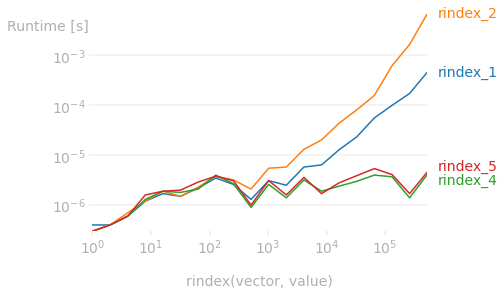

In [33]:
import perfplot
import operator
import numpy as np

def rindex_1(vector, value):
    if value not in vector:
        return None
    vector.reverse()
    i = vector.index(value)
    vector.reverse()
    return len(vector) - i - 1

def rindex_2(vector, value):
    if value not in vector:
        return None
    return len(vector) - vector[::-1].index(value) - 1

# produit des résultats différents dans certain cas
def rindex_3(vector, value):
    if value not in vector:
        return None
    return len(vector) - next(i for i, val in enumerate(reversed(vector)) if val == value)

def rindex_4(vector, value):
    if value not in vector:
        return None
    return len(vector) - operator.indexOf(reversed(vector), value) - 1

def rindex_5(vector, value):
    if value not in vector:
        return None
    for i, v in enumerate(reversed(vector)):
        if v == value:
            return len(vector) - i - 1


def args(n):
    vector = list(np.random.randint(10, size=n))
    value = 1
    return vector, value


def equality_check(x, y):
    if x != y:
        print(f"Values not equal: {x} and {y}")
        return False
    return True

b = perfplot.bench(
    # définit les arguments vector et value pour chaque test
    setup=lambda n: args(n),  # or setup=np.random.rand
    # les fonctions à tester
    kernels=[rindex_1, rindex_2, rindex_4, rindex_5], # , rindex_3
    # les noms des fonctions
    labels=['rindex_1', 'rindex_2', 'rindex_4', 'rindex_5'], # , 'rindex_3'
    # l'intervalle des n à tester
    n_range=[2**k for k in range(20)],
    xlabel="rindex(vector, value)",
    # More optional arguments with their default values:
    # mettre à True ou False pour forcer l'échelle
    # logx="auto",  # set to True or False to force scaling
    # logy="auto",
    # mettre à None pour désactiver l'assertion de "correctitude"
    equality_check=None #equality_check # np.allclose,  # set to None to disable "correctness" assertion
    # show_progress=True,
    # target_time_per_measurement=1.0,
    # max_time=None,  # maximum time per measurement
    # time_unit="s",  # set to one of ("auto", "s", "ms", "us", or "ns") to force plot units
    # relative_to=1,  # plot the timings relative to one of the measurements
    # flops=lambda n: 3*n,  # FLOPS plots
)

b.save("rindex_perfplot.png")
b.show()


## Vectors cartesian product

### Standard approach

In [ ]:
import numpy as np
from itertools import product

l1, l2, l3 = [0, 1], [2, 2], ['A', None]
res = list(product(l1, l2, l3))
print(res)

a1 = np.asarray(l1)
a2 = np.asarray(l2)
a3 = np.asarray(l3)
res = np.asarray(list(product(a1, a2, a3)))
print(res)

### Alternatives

In [ ]:
import itertools
import pandas as pd
import numpy as np

def cross_vectors_1(vectors_list):   # the best
    return list(itertools.product(*vectors_list))


def cross_vectors_2(vectors_list):
    if len(vectors_list) == 1:
        return vectors_list[0]
    res = pd.Series(vectors_list[0], name='0')
    for i, v in enumerate(vectors_list[1:]):
        s = pd.Series(v, name=str(i+1))
        res = pd.merge(res, s, how='cross')
    return list(res.itertuples(index=False, name=None))


def cross_vectors_3(vectors_list):
    return pd.MultiIndex.from_product(vectors_list).to_list() # ne fonctionne pas avec des éléments non hashables


def cross_vectors_4(vectors_list):
    meshgrid_result = np.meshgrid(*vectors_list)
    return [(vector[0], vector[1]) for vector in zip(*meshgrid_result)]

### Micro benchmark

In [ ]:
from pepper_tests import *
from pepper_casts import to_ndarrays_list

vectors_list = [
    [True, False],
    [0, 1, 2],
    ['A', 'B', 'C'],
    [None, [], [None], [None, None]],
]

functions_list = [
    cross_vectors_1,
    cross_vectors_2,
    # cross_vectors_3,
    cross_vectors_4,
]

benchmarck(functions_list, vectors_list)
benchmarck(functions_list, to_ndarrays_list(vectors_list))

## s.unique().sort_values() ou s.sort_values().unique() ?